# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Fahmi Agung Maulana - 1301213305
2. Gloria Natasya Irene Sidebang - 1301213445
3. Nizam Abdullah - 1301213232

#### Latar Belakang
Metro Interstate Traffic Volume adalah kumpulan data Volume lalu lintas Interstate 94 arah barat tiap jam mulai  dari tahun 2012 hingga 2018 yang dilaporkan oleh MN DoT ATR 301 , berlokasi di tengah-tengah Minneapolis dan St Paul, MN. Dataset ini terdiri dari 48204 baris dan 9 fitur, termasuk fitur target yang akan diprediksi. Fitur tersebut terbagi menjadi 6 fitur numerik dan 3 fitur kategorik dengan rincian sebagai berikut :
* Fitur Kategorik
  * holiday : Hari libur nasional AS ditambah hari libur regional, Minnesota State Fair
  * weather_main : Deskripsi tekstual singkat tentang cuaca saat ini
  * weather_description : Deskripsi tekstual yang lebih panjang tentang cuaca saat ini
* Fitur Numerik
  * temp : Suhu rata-rata dalam kelvin
  * rain_1h : Jumlah hujan dalam mm yang terjadi dalam satu jam
  * snow_1h : Jumlah salju dalam mm yang terjadi dalam satu jam
  * cloud_all : Persentase tutupan awan
  * date_time : Jam data yang dikumpulkan dalam waktu CST lokal
  * traffic_volume : volume lalu lintas arah barat yang dilaporkan tiap jam oleh I-94 ATR 301 **(fitur target)**

Tujuan dari percobaan ini adalah menentukan model dengan skema hyperparameter mana yang cocok untuk memprediksi nilai dari fitur 'traffic_volume'.


Dataset yang kami gunakan berasal dari https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume

####Import Dataset

In [ ]:
pip install keras

In [ ]:
pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=de78e2aaa69059022fe78f7dc236e1400bdf512b890cf075950ff5b7c3769e44
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
pip install graphviz

In [ ]:
from ann_visualizer.visualize import ann_viz;

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1Ci9ZjclzNcDZALETcERNR1Dnp_oNQBWr", sep=",", encoding='cp1252')

####Data Understanding

In [ ]:
df.shape

(48204, 9)

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
for column in df.columns:
    nunique_values =df[column].nunique()
    print(f"Nilai unik di kolom {column}: {nunique_values}")
    unique_values =df[column].unique()
    print(f"Nilai unik di kolom {column}: {unique_values}\n")

Nilai unik di kolom holiday: 12
Nilai unik di kolom holiday: ['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']

Nilai unik di kolom temp: 5843
Nilai unik di kolom temp: [288.28 289.36 289.58 ... 306.08 304.41 304.9 ]

Nilai unik di kolom rain_1h: 372
Nilai unik di kolom rain_1h: [0.0000e+00 2.5000e-01 5.7000e-01 3.8000e-01 3.0000e-01 2.9000e-01
 4.4000e-01 3.6000e-01 2.1600e+00 3.3900e+00 8.4000e-01 7.6000e-01
 5.1000e-01 6.9000e-01 1.0000e+00 1.2900e+00 1.3400e+00 1.8400e+00
 1.7000e+00 4.7000e-01 1.4100e+00 1.4400e+00 7.0000e-01 3.1800e+00
 6.1000e-01 6.4000e-01 1.0200e+00 5.4200e+00 8.6400e+00 5.7400e+00
 4.9800e+00 3.6500e+00 6.8000e-01 4.6000e-01 4.2000e-01 1.5200e+00
 8.9000e-01 1.4000e+00 1.2190e+01 2.2900e+00 7.5400e+00 6.9400e+00
 1.6380e+01 1.7800e+00 2.5400e+00 9.1400e+00 3.0500e+00 1.6500e+00
 4.4450e+01 3.8100e+00 5.8400e+0

In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Berdasarkan data understanding yang telah dilakukan didapatkan informasi berupa
Kategorikal Kolom :
- holiday
- weather_main
- weather_description

Numerik kolom :
- temp
- rain_1h
- snow_1h
- clouds_all
- date_time
- traffic_volume


####Data Preprocessing PART 1

#####Duplicate Data

In [ ]:
print("Jumlah data duplikat : " , df.duplicated().sum(), "record")

#Drop data duplikat
df = df.drop_duplicates(keep='first')
print("Jumlah data duplikat setelah di drop : " , df.duplicated().sum(), "record")

Jumlah data duplikat :  17 record
Jumlah data duplikat setelah di drop :  0 record


#####Missing Value

In [ ]:
print("Jumlah record yang memiliki nilai NaN : ", df.isnull().sum().sum())

Jumlah record yang memiliki nilai NaN :  0


#####Feature Engeenering

Melakukan feature engeneering pada kolom datetime dan membuat fungsi dayPart untuk feature engeenering waktu berdasarkan jam

In [ ]:
def dayPart(hour):
    if hour >= 4 and hour <= 5:
        return 1 # dawn
    elif hour >= 6 and hour <= 7:
        return 2 # early morning
    elif hour >= 8 and hour <= 10:
        return 3 # late morning
    elif hour >= 11 and hour <= 13:
        return 4 # noon
    elif hour >= 14 and hour <= 16:
        return 5 # afternoon
    elif hour >= 17 and hour <= 19:
        return 6 # evening
    elif hour >= 20 and hour <= 22:
        return 7 # night
    else:
        return 8 # midnight

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['week'] = df['date_time'].dt.week
df['dayofweek'] = df['date_time'].dt.dayofweek
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute
df['second'] = df['date_time'].dt.second

df['hour_day_part'] = df['hour'].apply(dayPart)

df['is_weekend'] = df['date_time'].dt.dayofweek // 5
df.set_index('date_time', inplace = True)

<ipython-input-15-35ccbe6b7d3e>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date_time'].dt.week


####EDA

In [ ]:
cat_col = ['holiday', 'weather_main', 'weather_description', 'hour_day_part']
num_col = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'year', 'month', 'day', 'week', 'dayofweek', 'hour', 'minute', 'second']

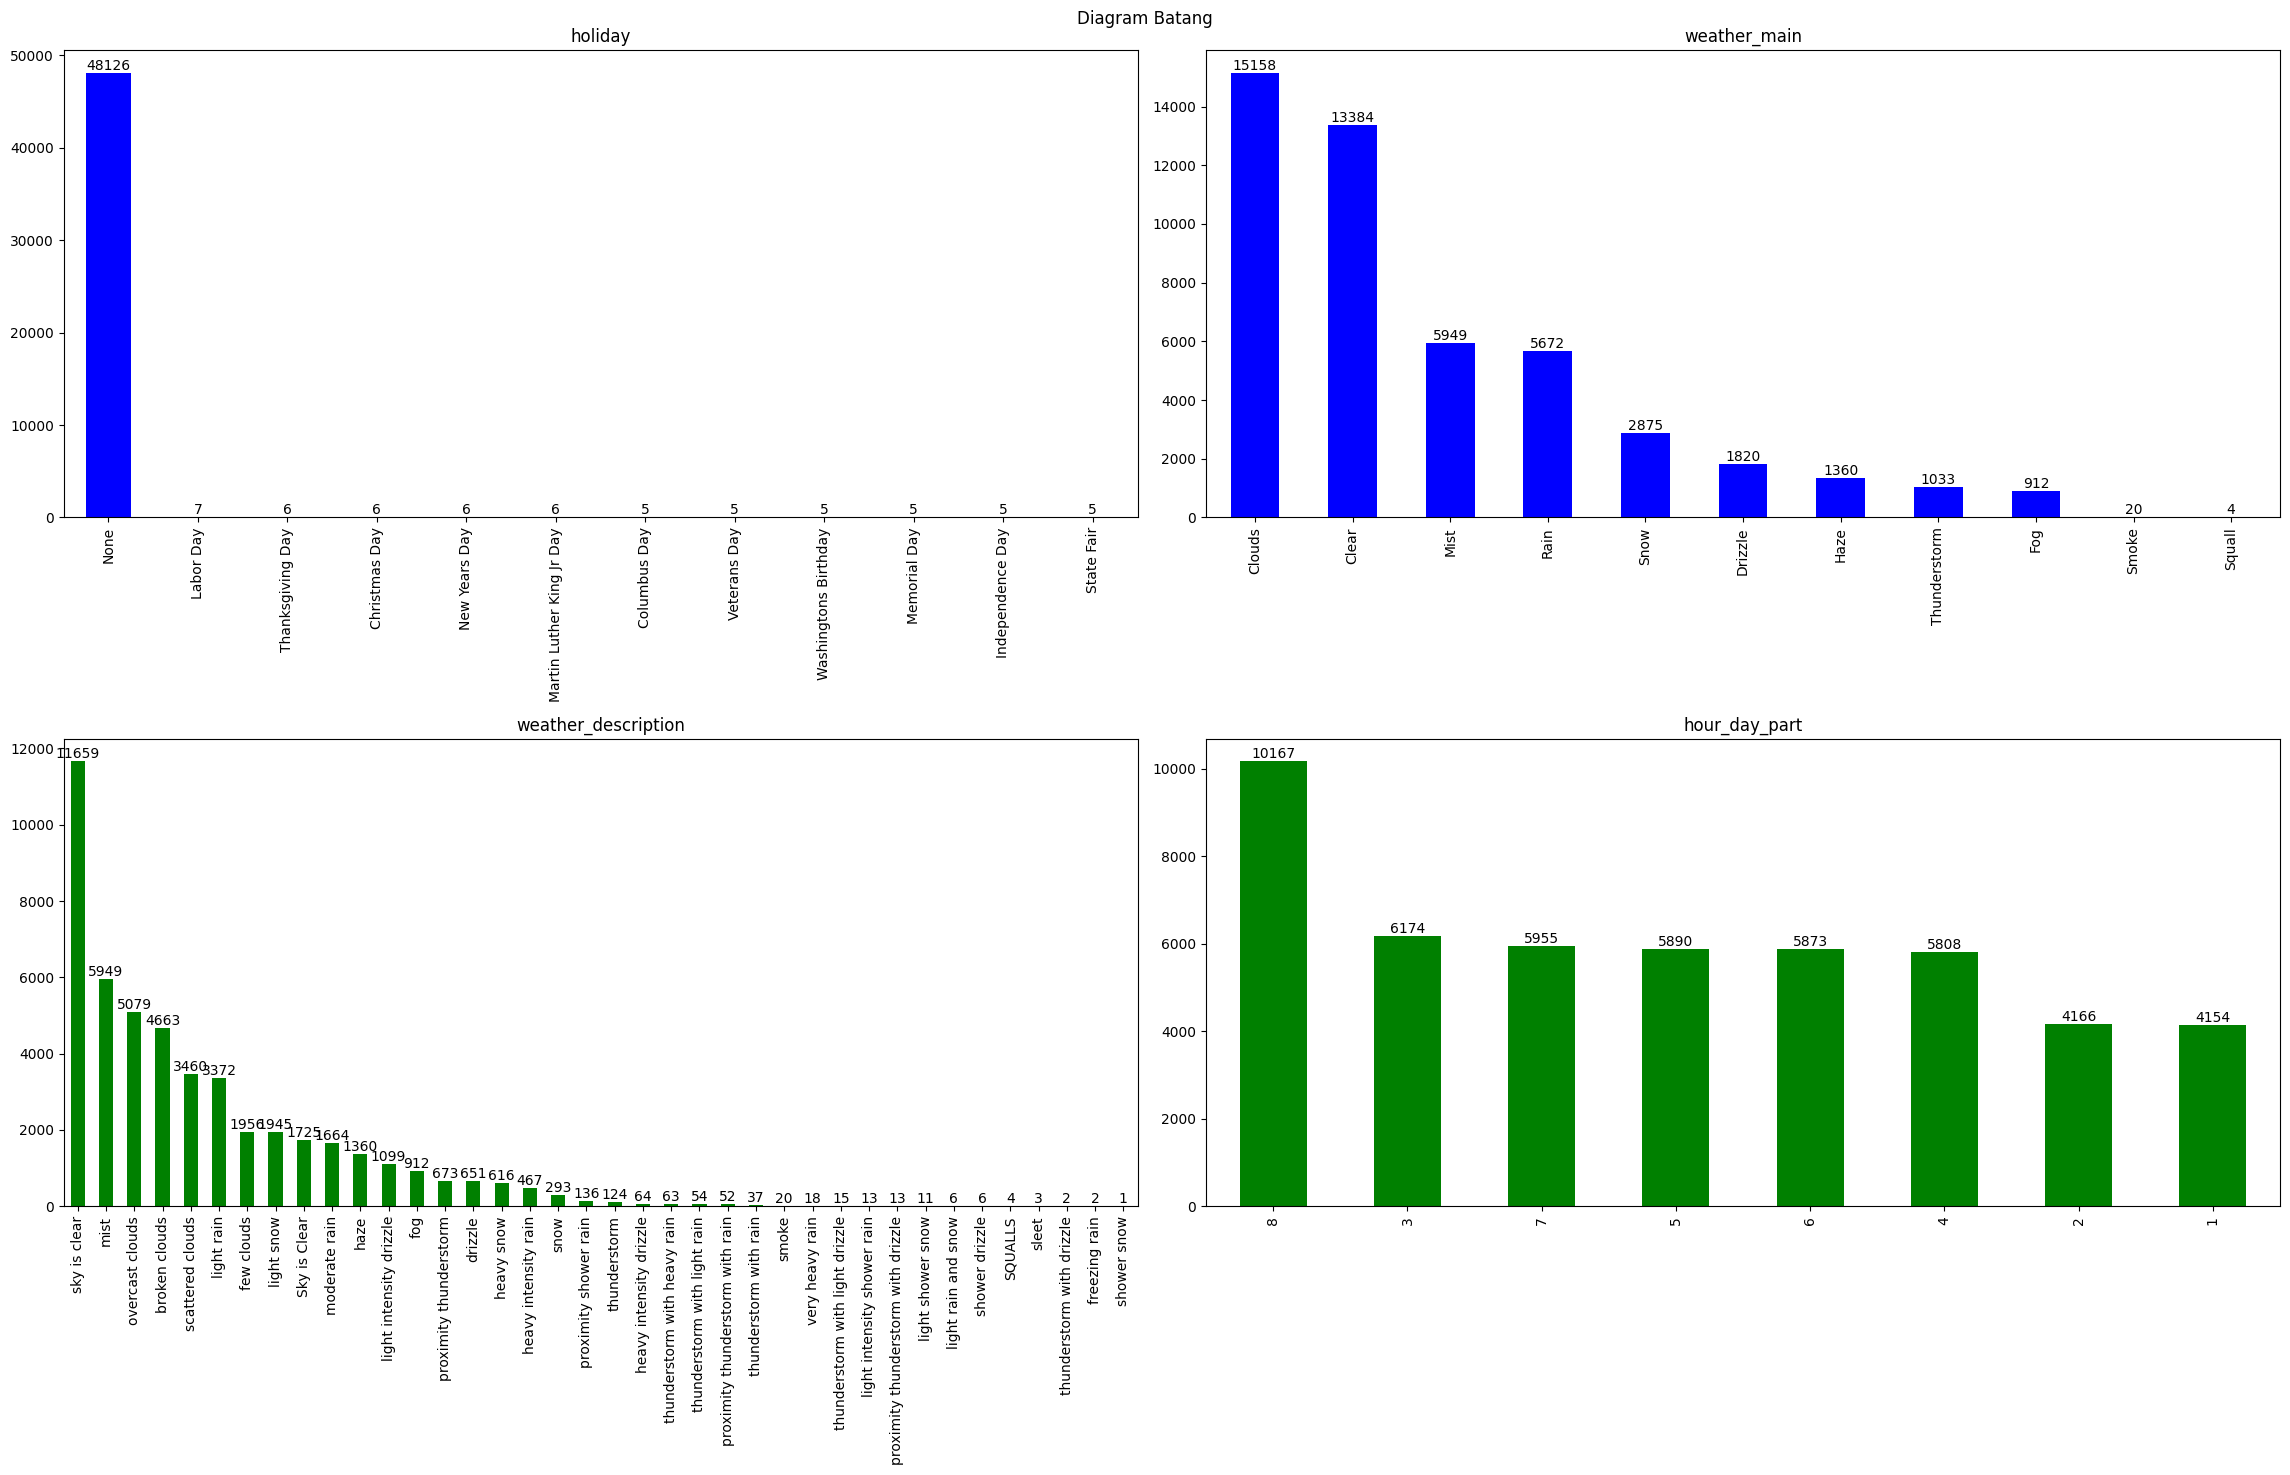

In [ ]:
columns_top = cat_col[:2]
columns_bottom = cat_col[2:]

# Membuat subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(23, 15))
fig.suptitle('Diagram Batang')

# Loop untuk menggambar diagram batang untuk setiap kolom
for i, col in enumerate(columns_top):
    ax = axs[0, i]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='blue')  # Ganti warna batang sesuai kebutuhan
    ax.set_title(col)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

for i, col in enumerate(columns_bottom):
    ax = axs[1, i]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='green')  # Ganti warna batang sesuai kebutuhan
    ax.set_title(col)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

In [ ]:
def plot_count(df: pd.core.frame.DataFrame, col: str) -> None:
    f, ax = plt.subplots(1, 2, figsize=(25, 15))
    plt.subplots_adjust(wspace=0.2)

    # Subplot 1 - Histograms for each category
    categories = df[col].unique()
    for category in categories:
        sns.histplot(df[df[col] == category]['traffic_volume'], kde=True, ax=ax[0], label=f'Category {category}')
    ax[0].set_xlabel('traffic_volume')
    ax[0].set_ylabel('Density')
    ax[0].set_title(f'Histograms of traffic_volume by {col}', fontsize=14, fontweight='bold')
    ax[0].legend()

    # Subplot 2 - Bar Plot
    sns.barplot(x=col, y='traffic_volume', data=df, ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('traffic_volume')
    ax[1].set_title(f'{col} vs traffic_volume', fontsize=14, fontweight='bold')

    # Set label text color to white for Subplot 1
    for text in ax[0].get_legend().get_texts():
        text.set_color('black')

    # Add labels with values on top of the bars
    for p in ax[1].patches:
        ax[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

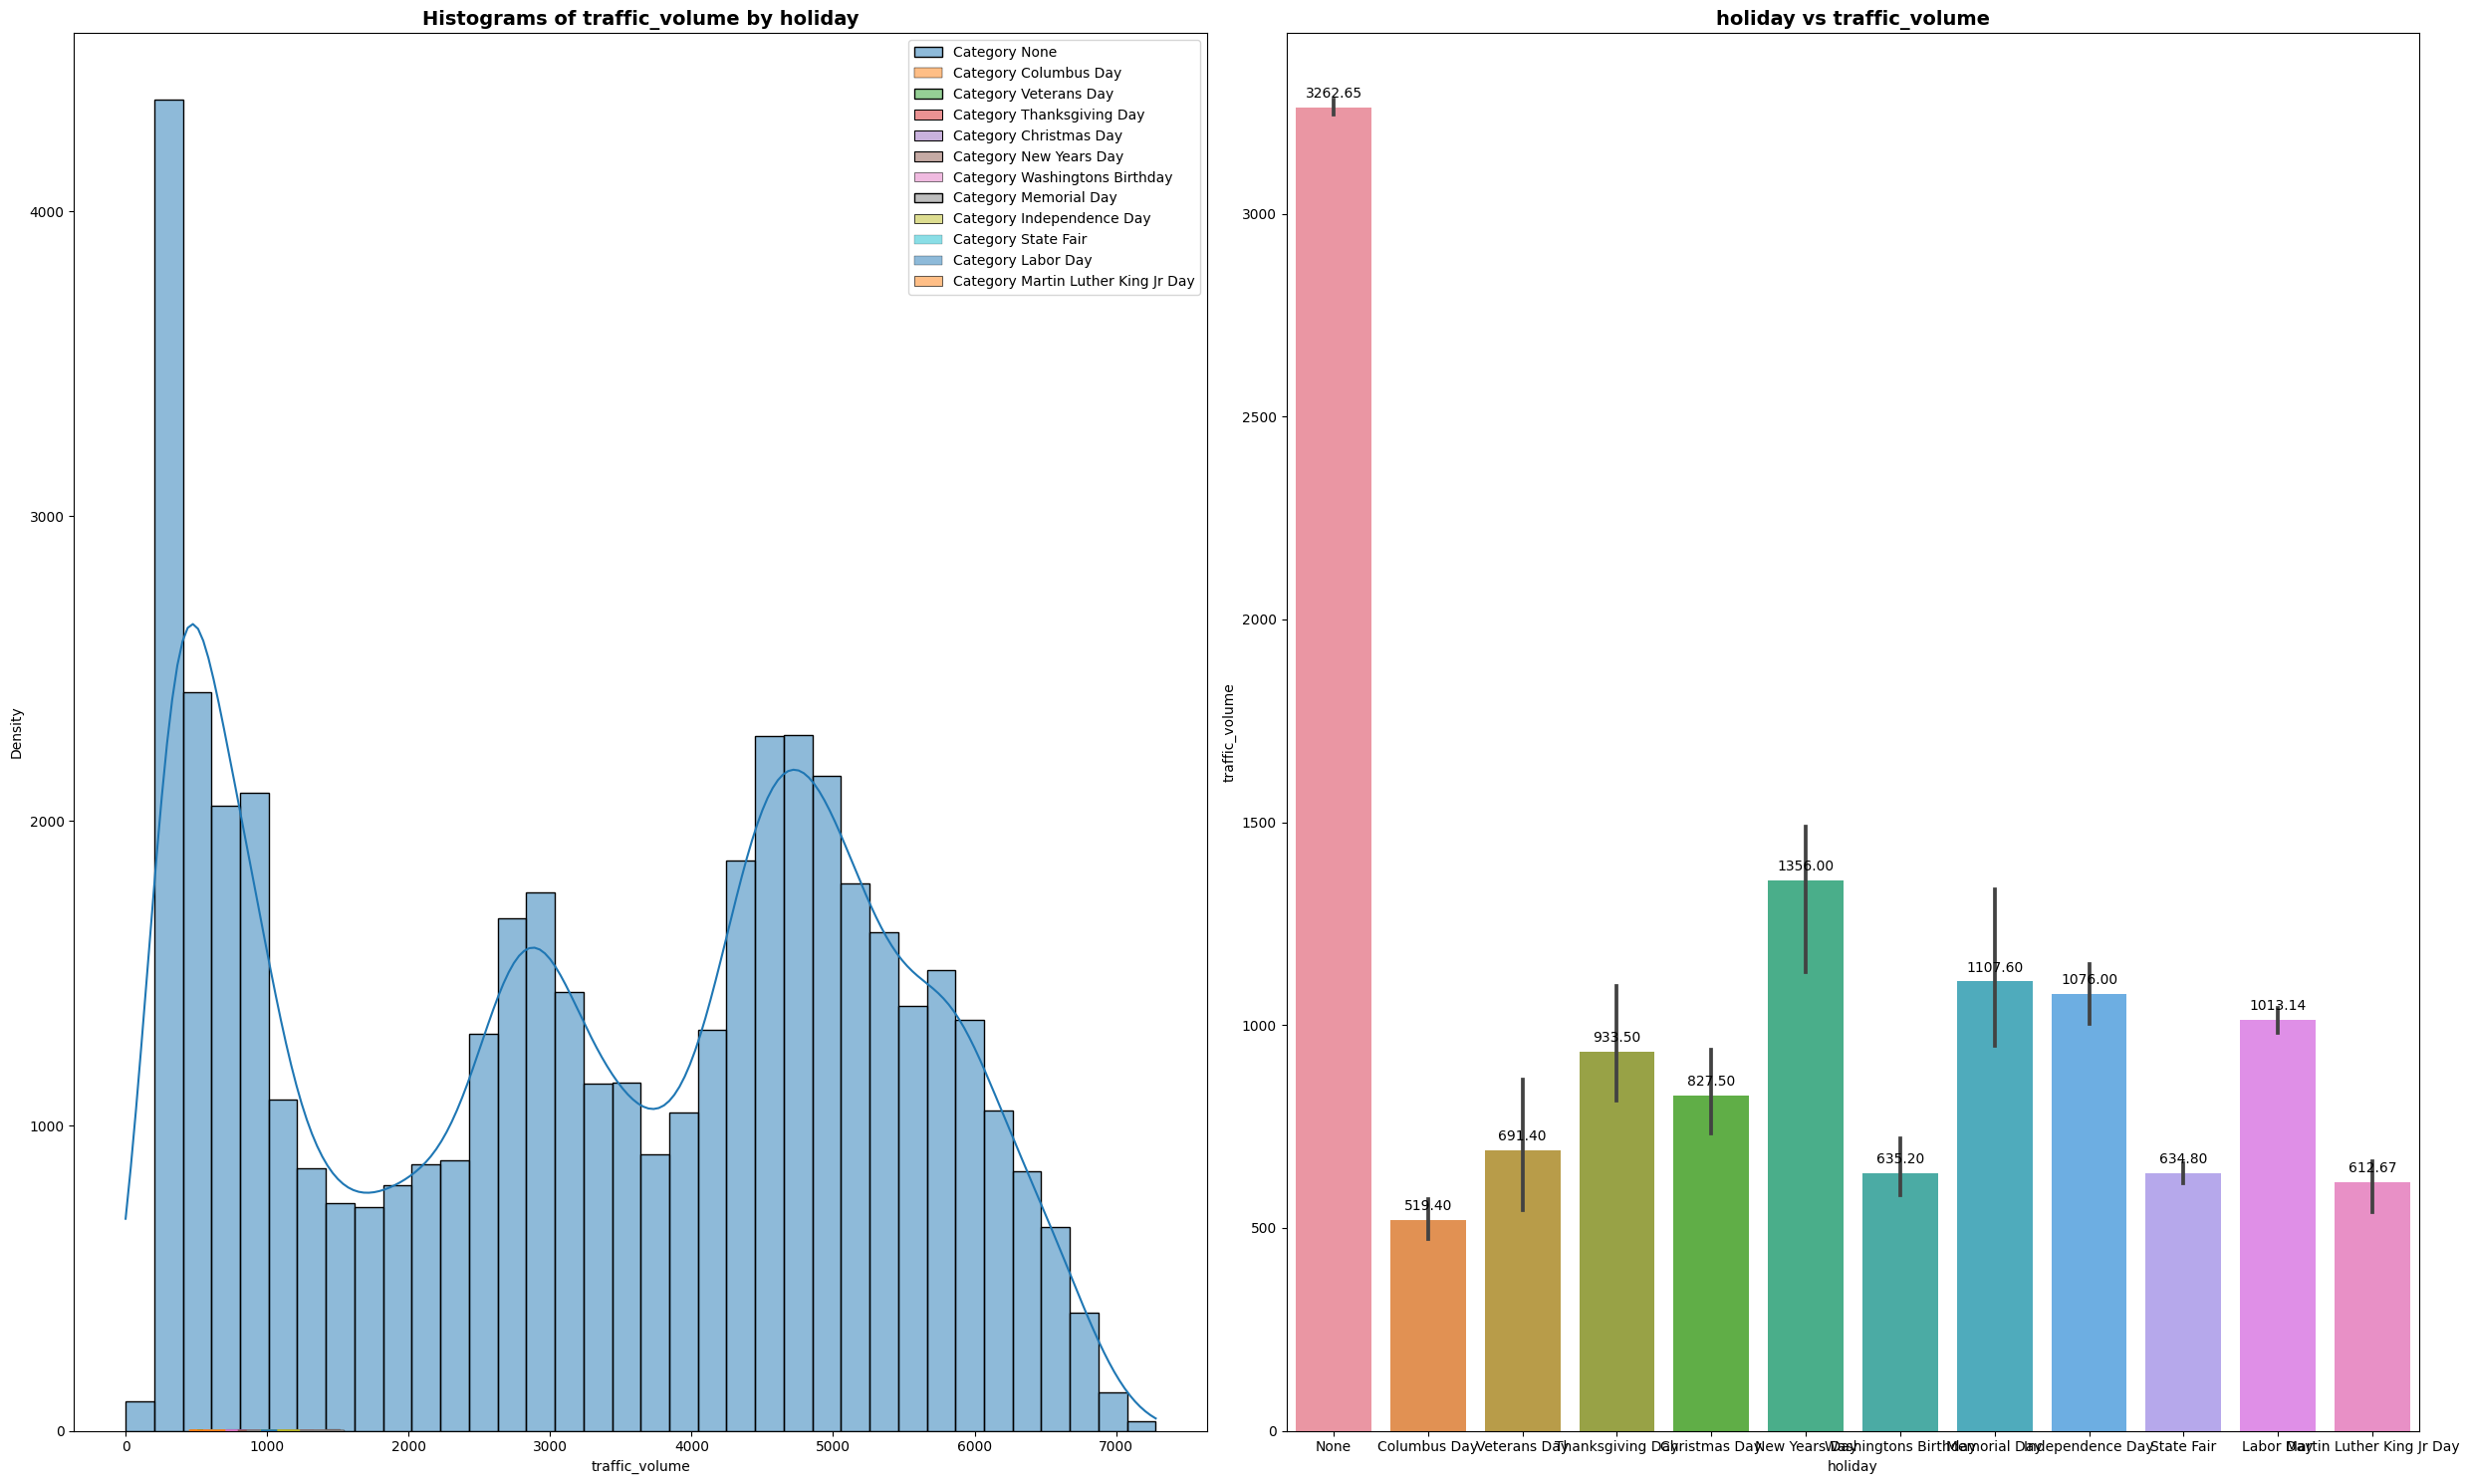

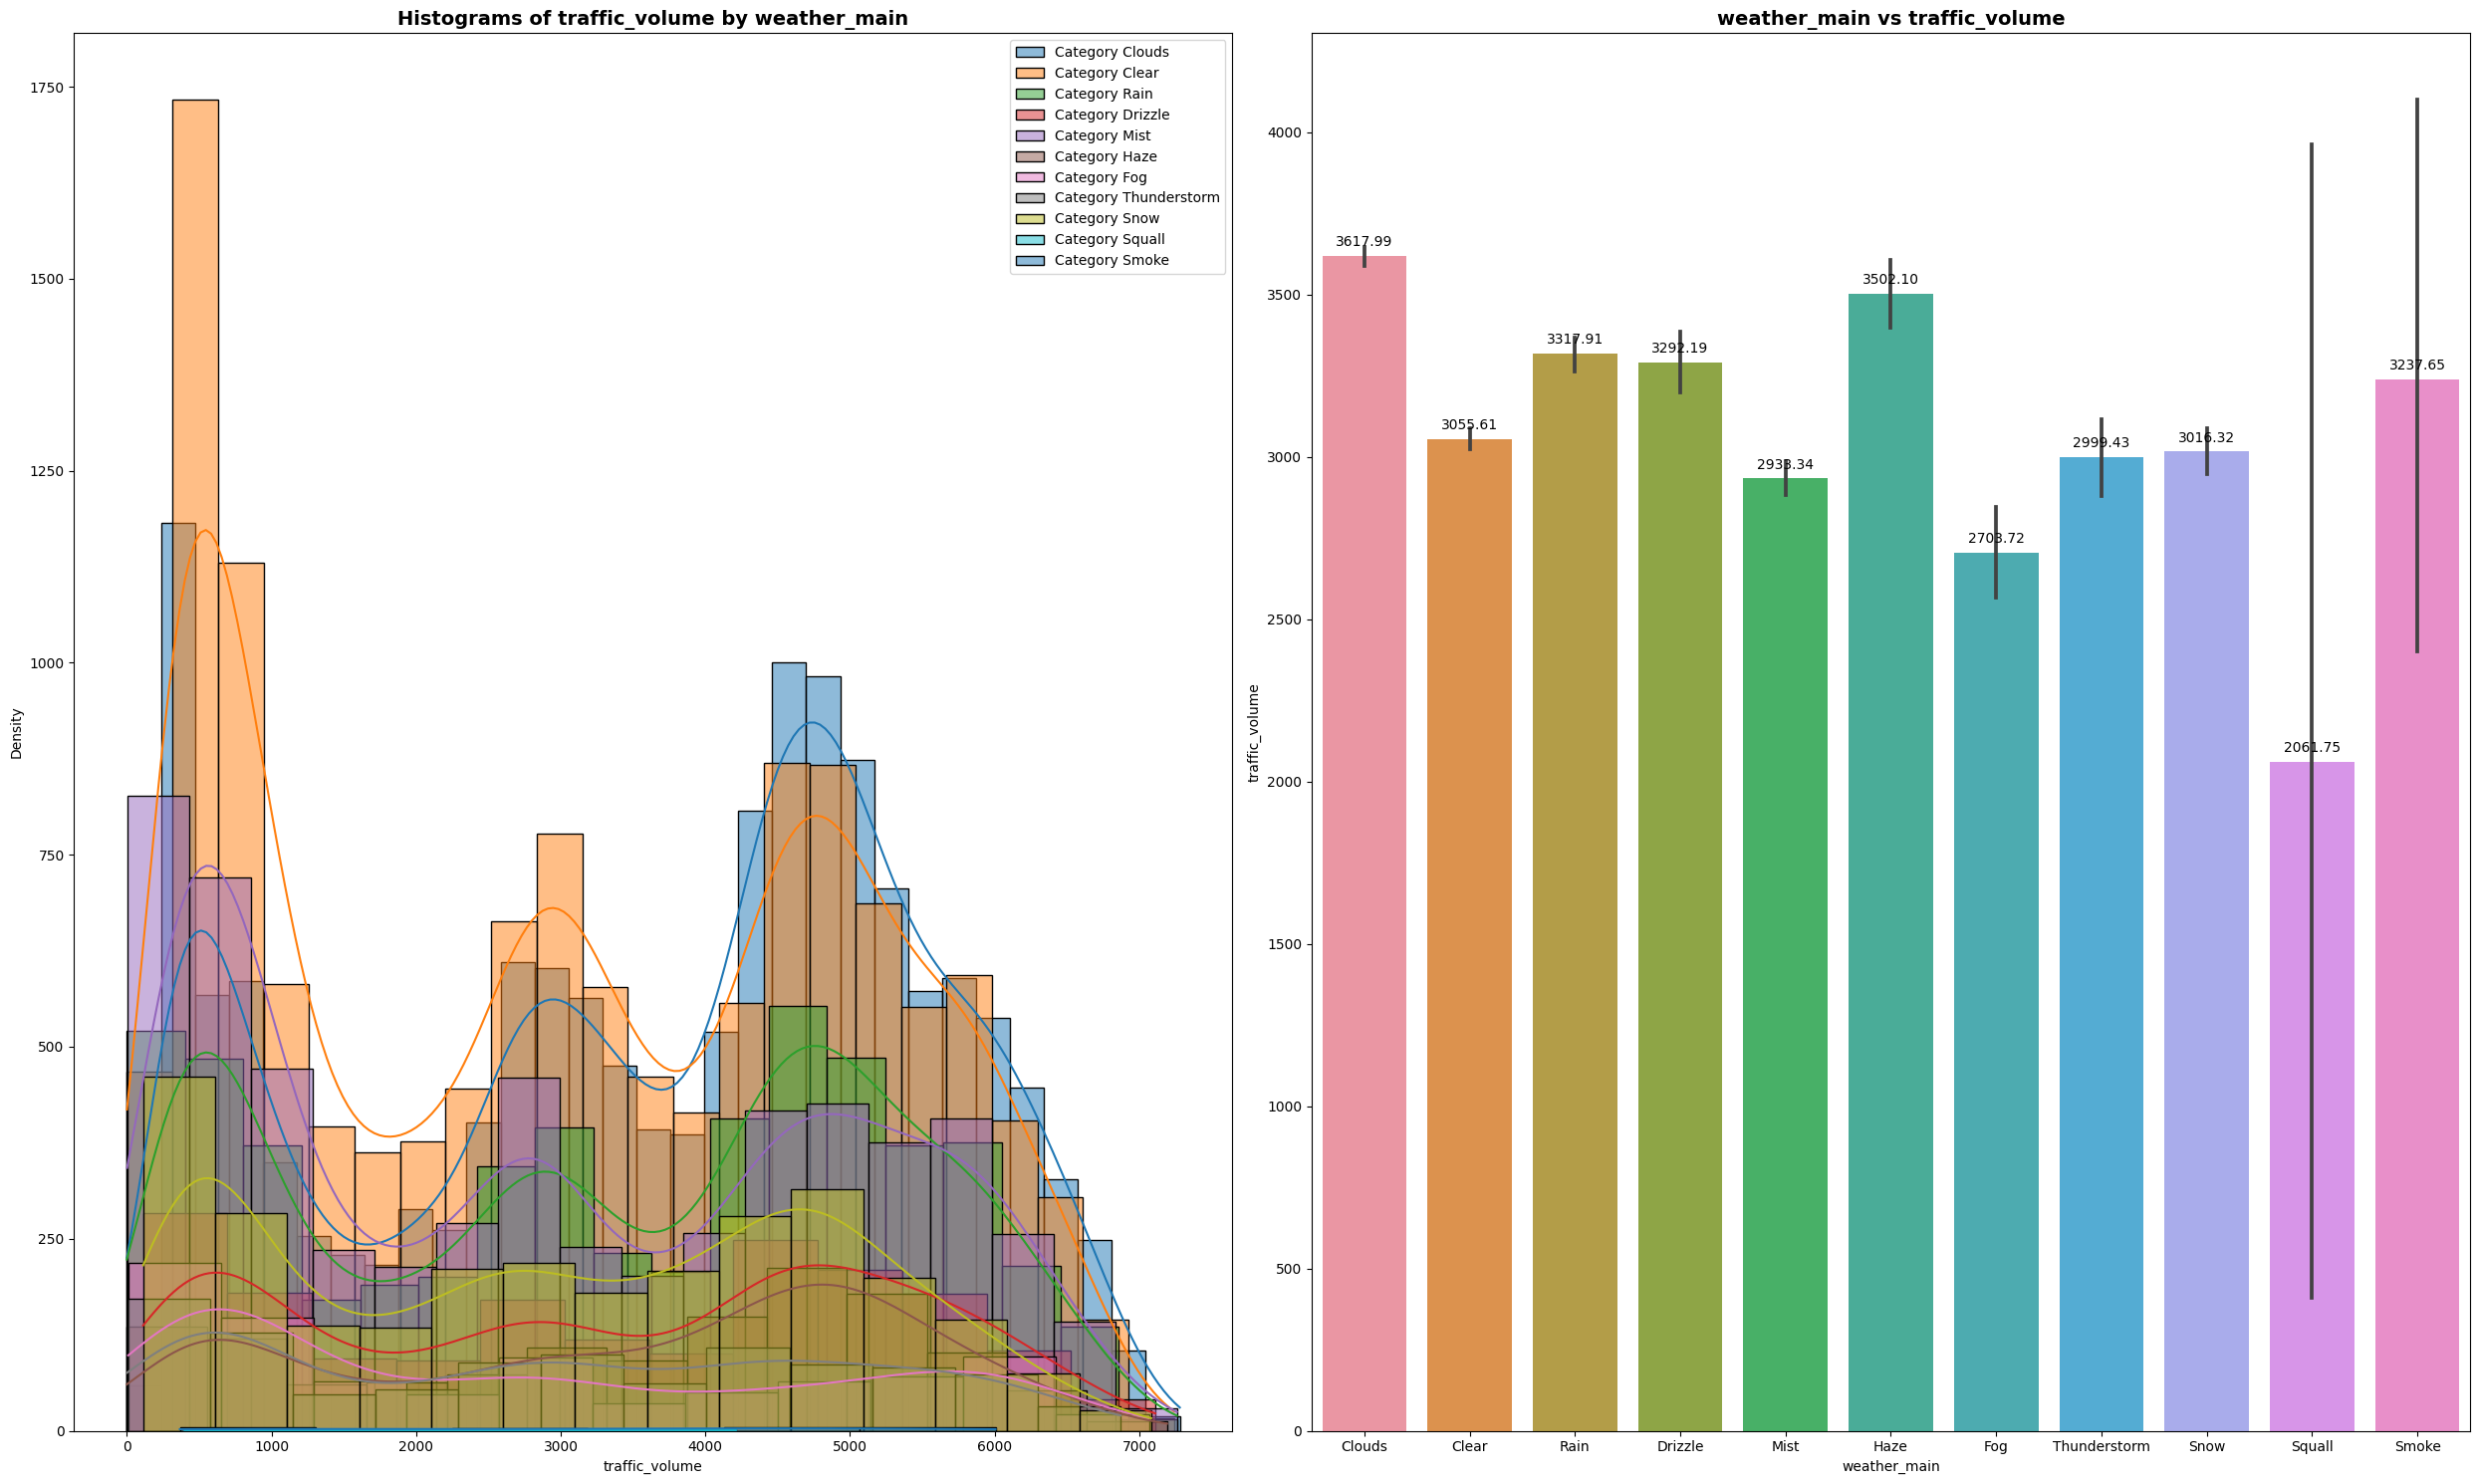

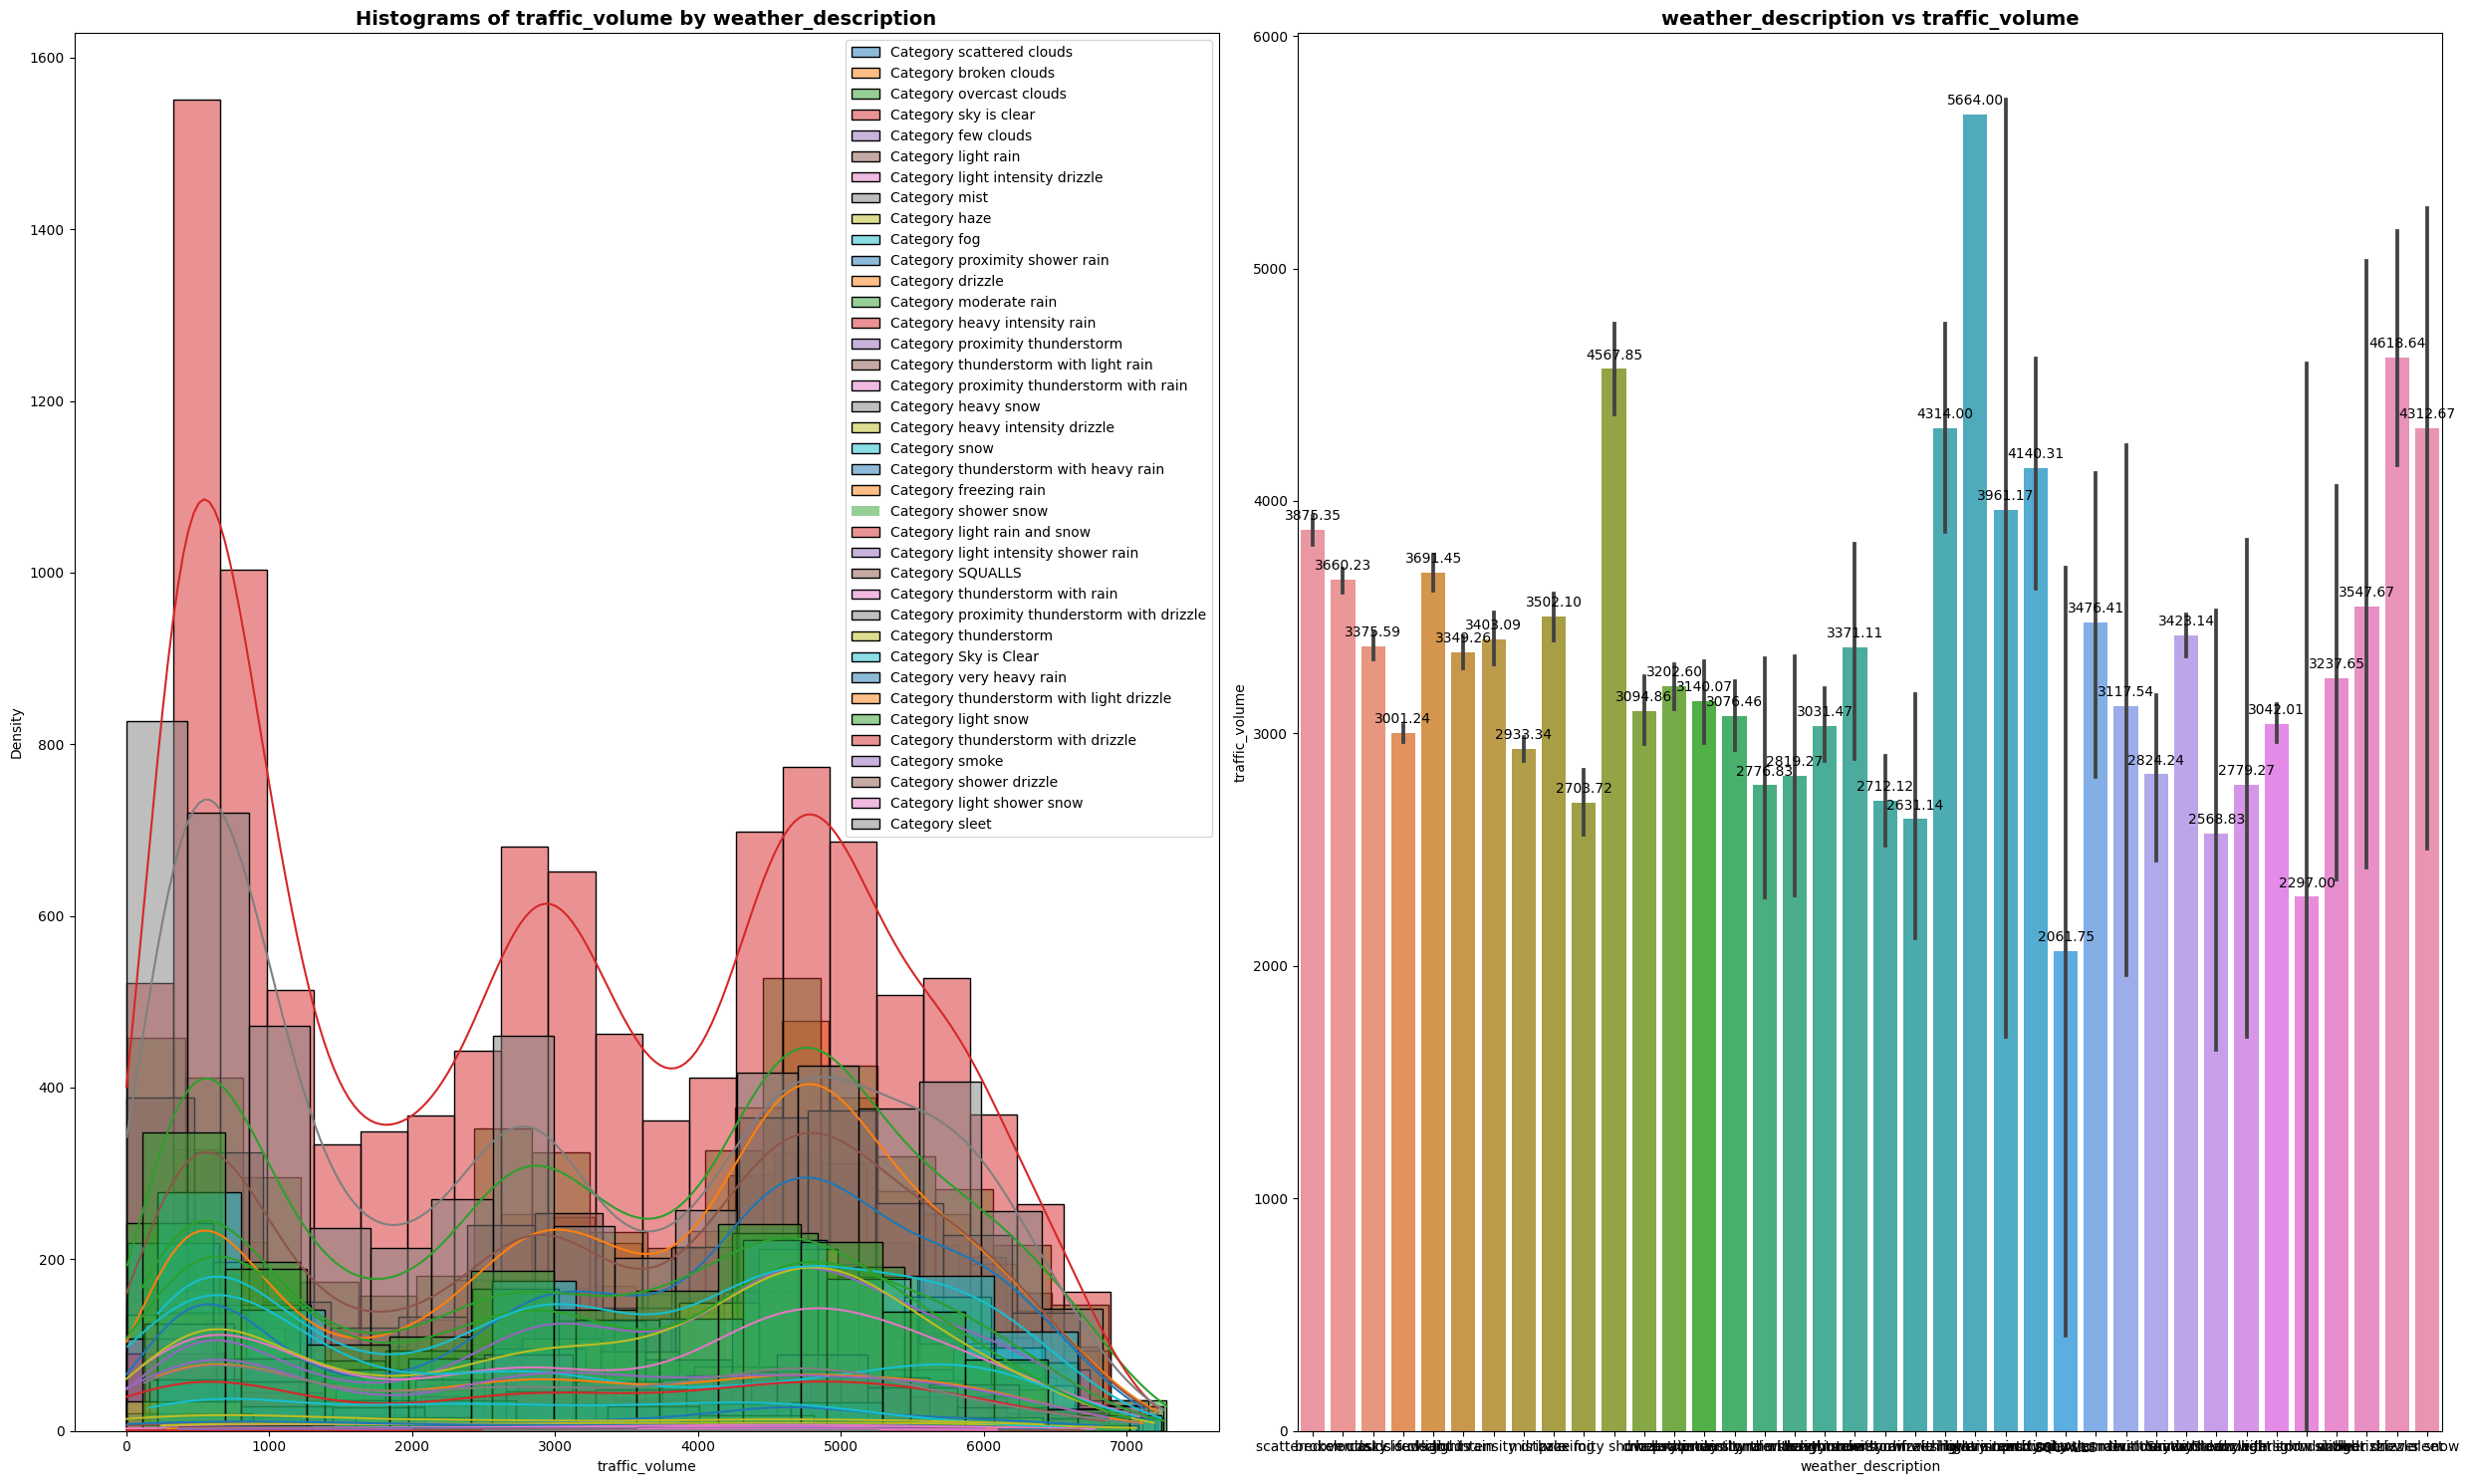

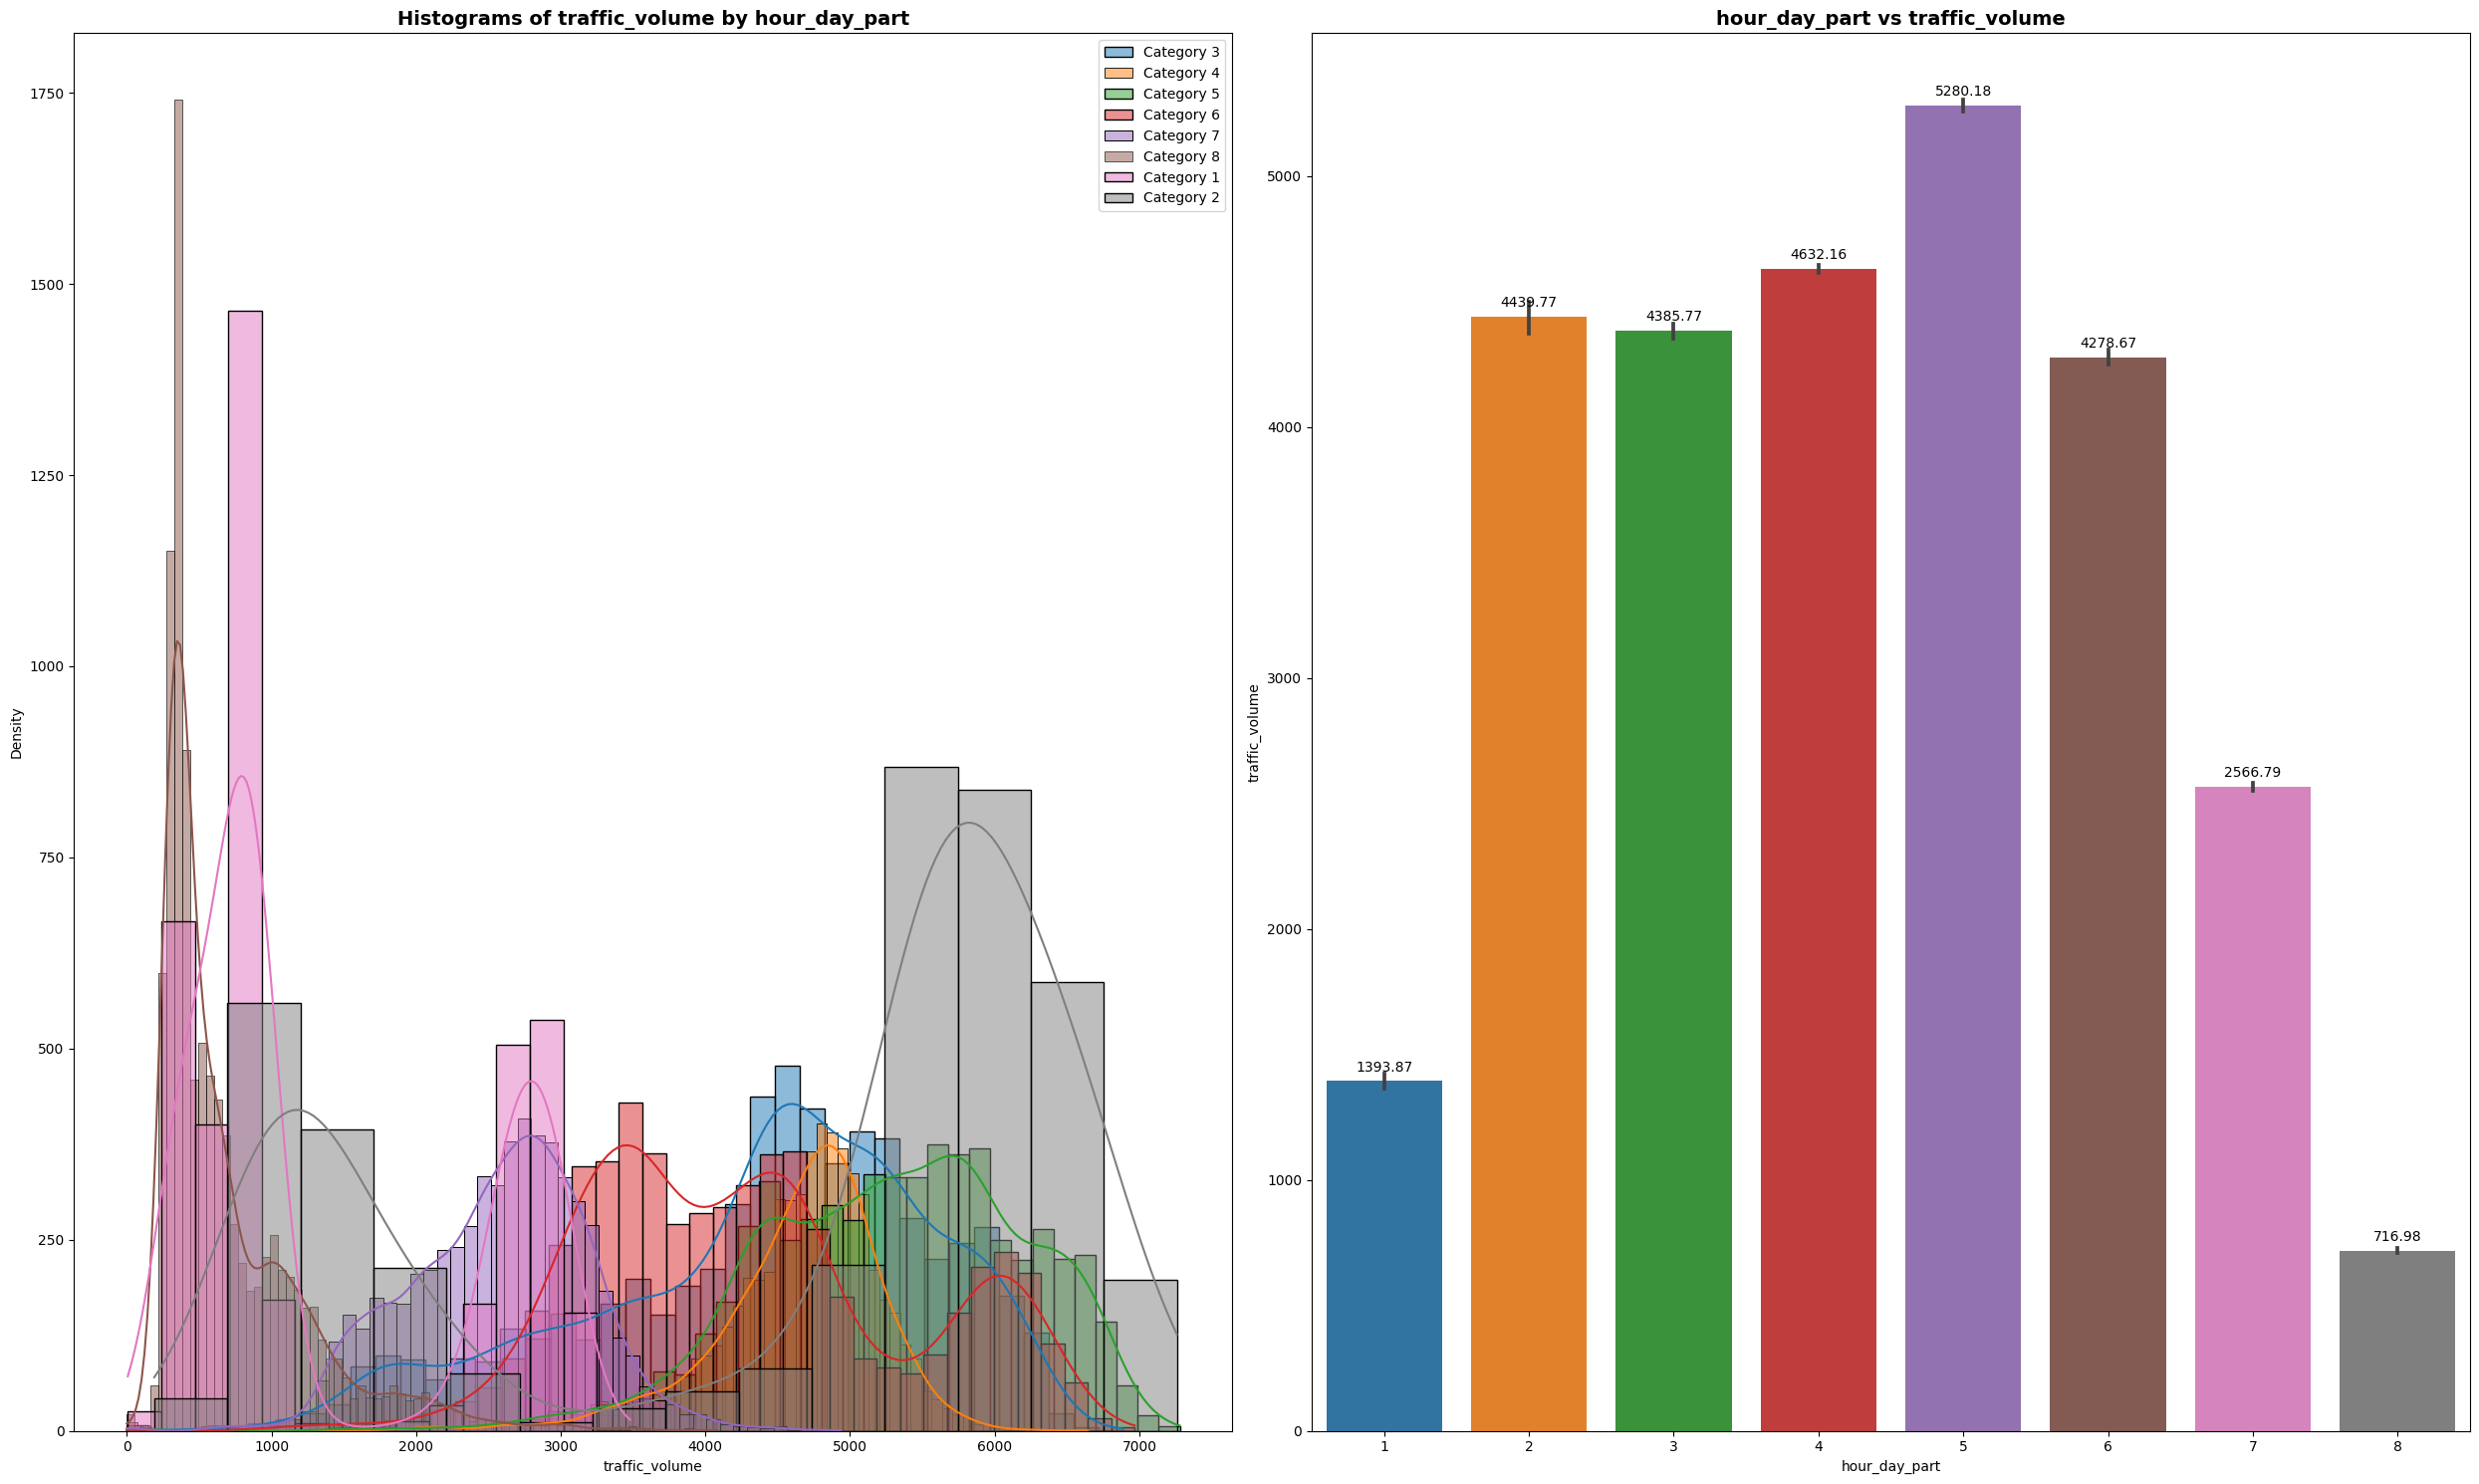

In [ ]:
for col in cat_col:
  plot_count(df, col)

Berdasarkan visualisasi kolom yang berupa kategorikal didapatkan bahwa:
1. Kolom holiday mayoritas diisi dengan "None" sehingga untuk isi yang lain akan diolah lagi menjadi satu kategori
2. weather_main dan weather_description memiliki hubungan satu sama lain yaitu weather_Description menjelaskan weather_main sehingga akan digunakan salah satu kolom saja. Selain itu, pada kolom weather_main masih terdapat beberapa kategori yang bisa digabungkan menjadi satu sehingga perlu diolah lagi

In [ ]:
def plot_boxplot_and_histogram(dataframe, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    plt.subplot(121)
    sns.boxplot(data=dataframe[column_name], orient="h")
    plt.title(f'Boxplot - {column_name}')

    # Histogram
    plt.subplot(122)
    sns.histplot(data=dataframe[column_name], kde=True)
    plt.title(f'Histogram - {column_name}')

    plt.tight_layout()
    plt.show()

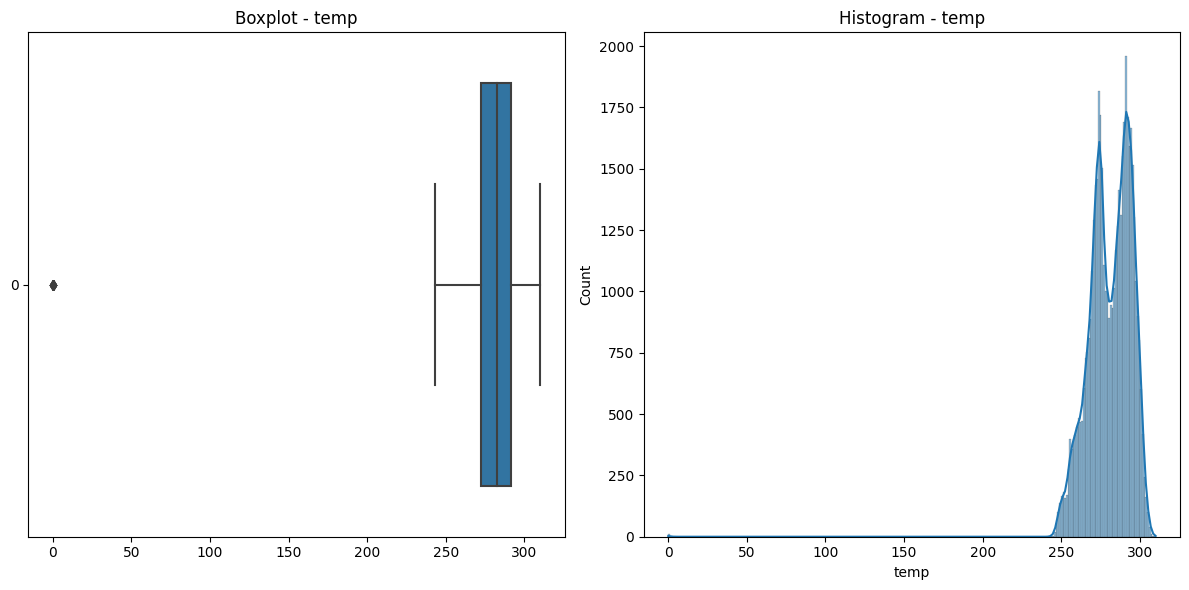

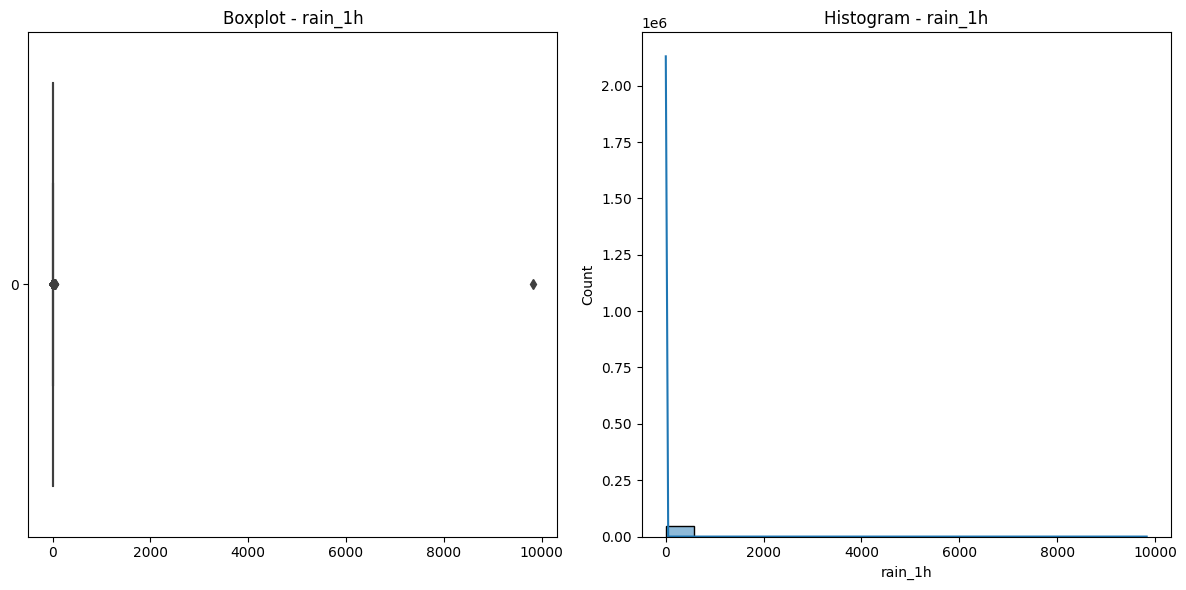

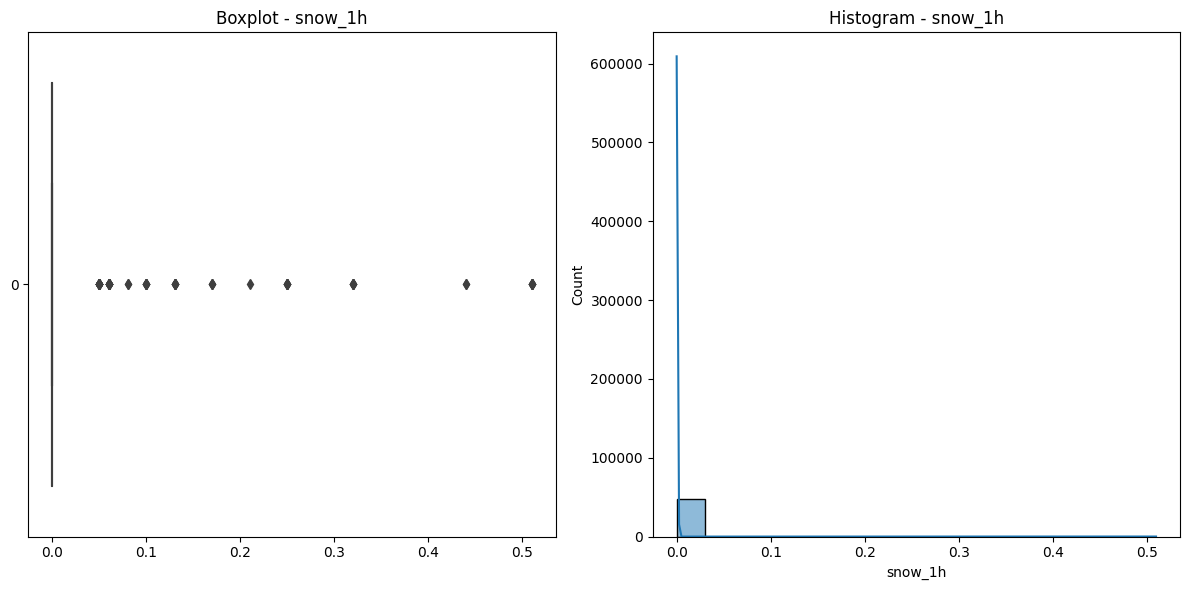

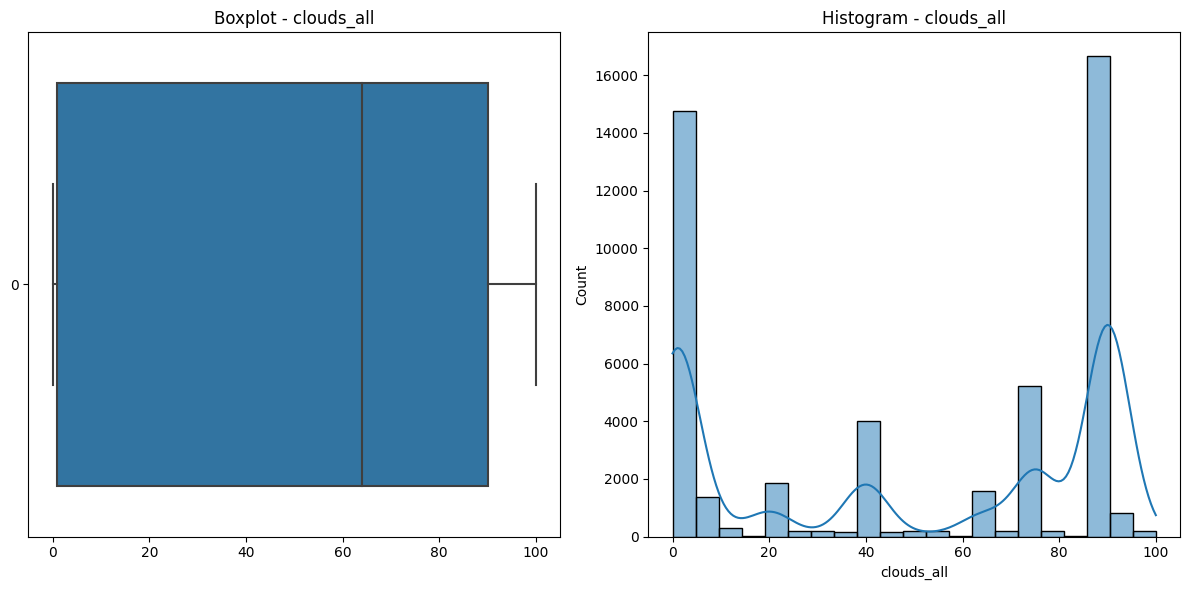

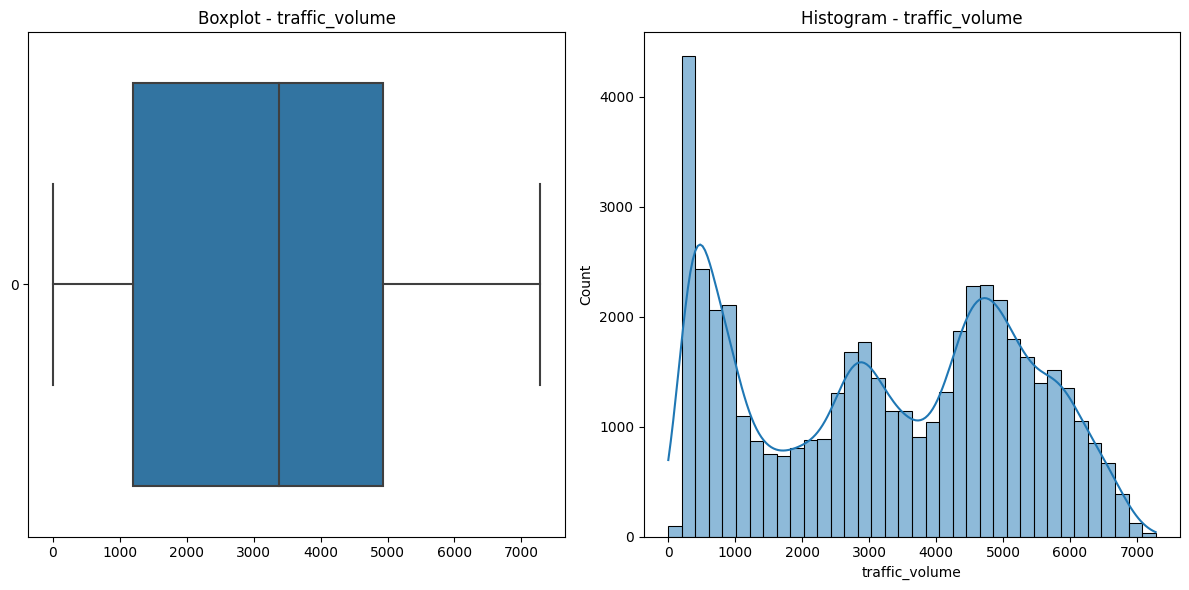

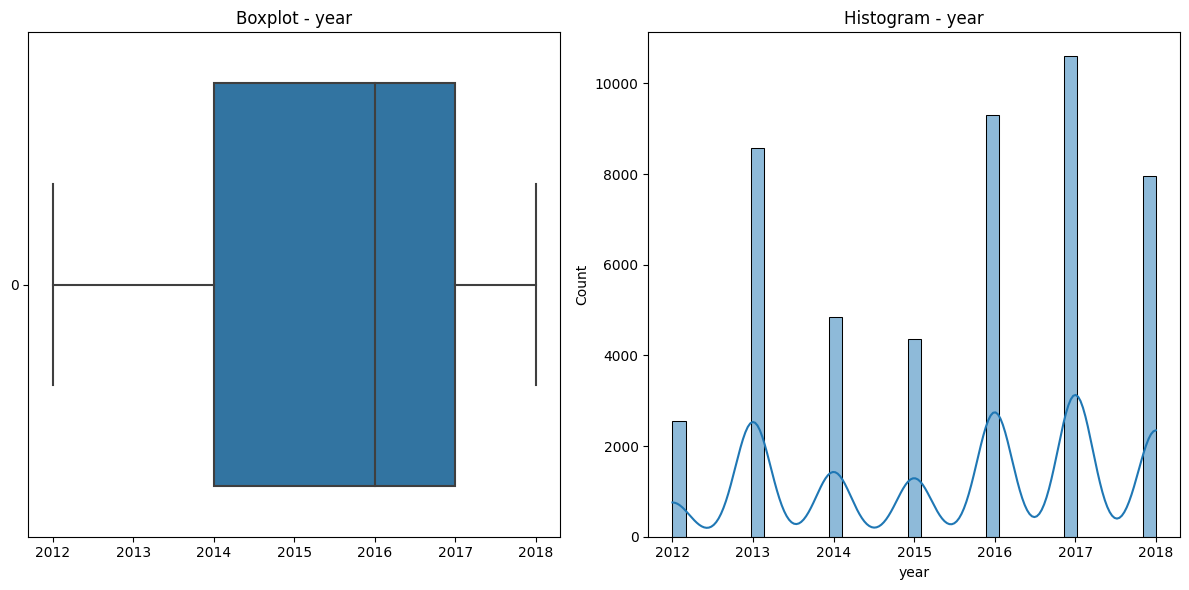

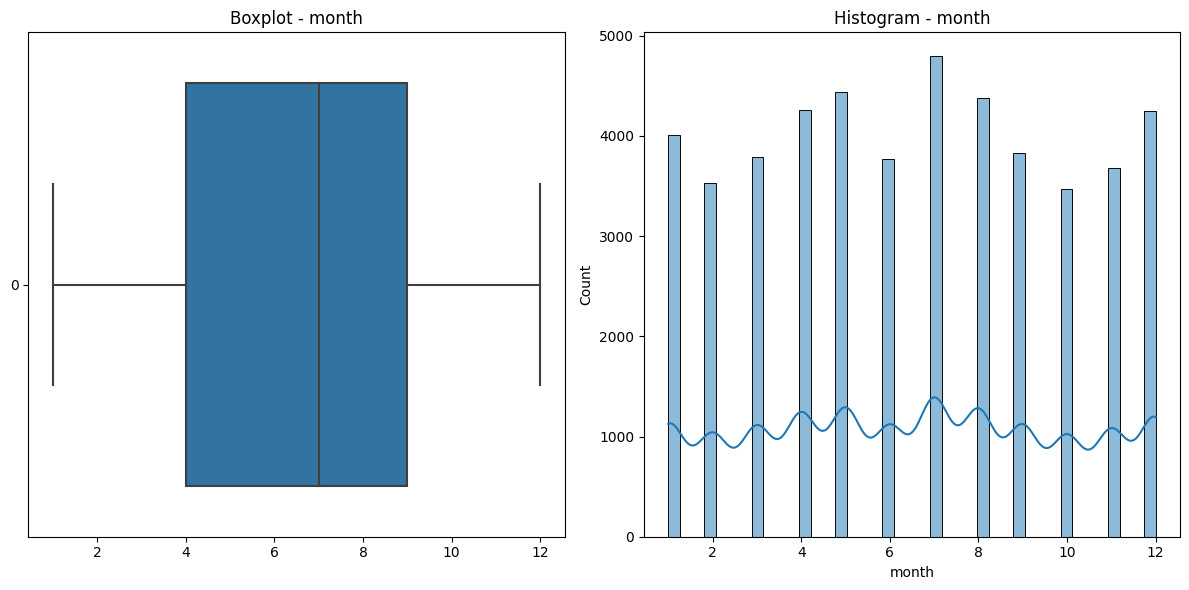

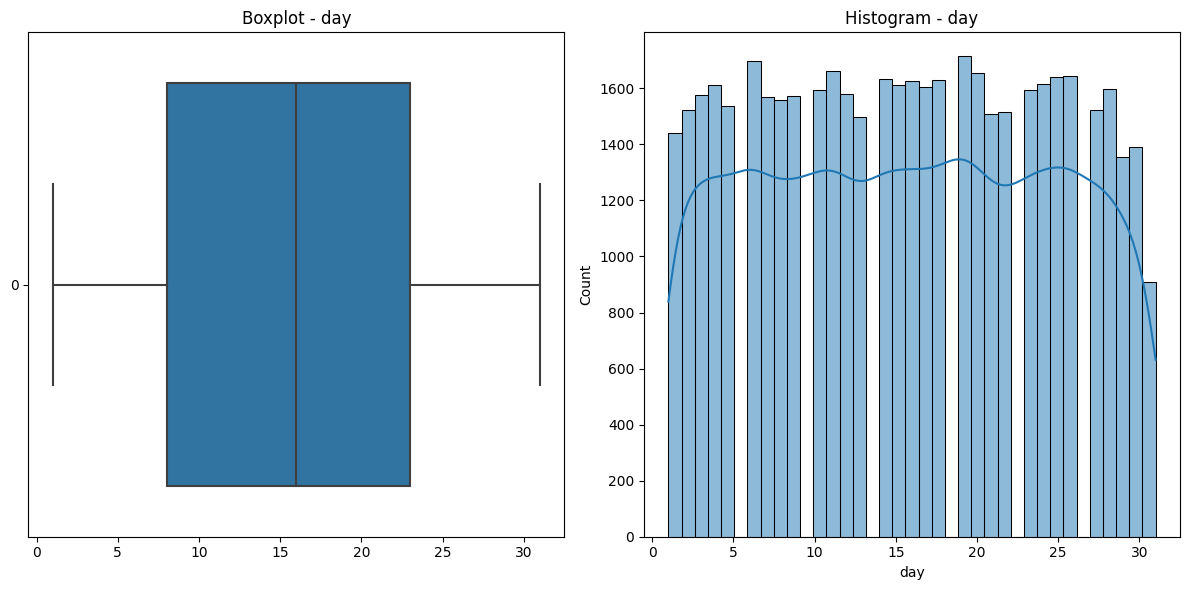

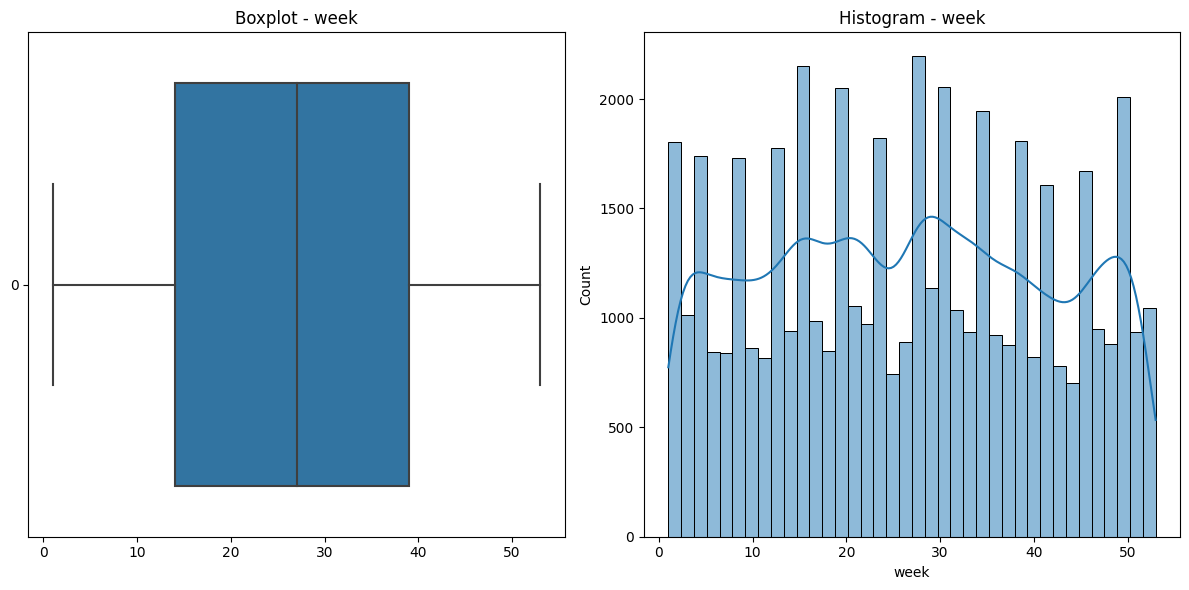

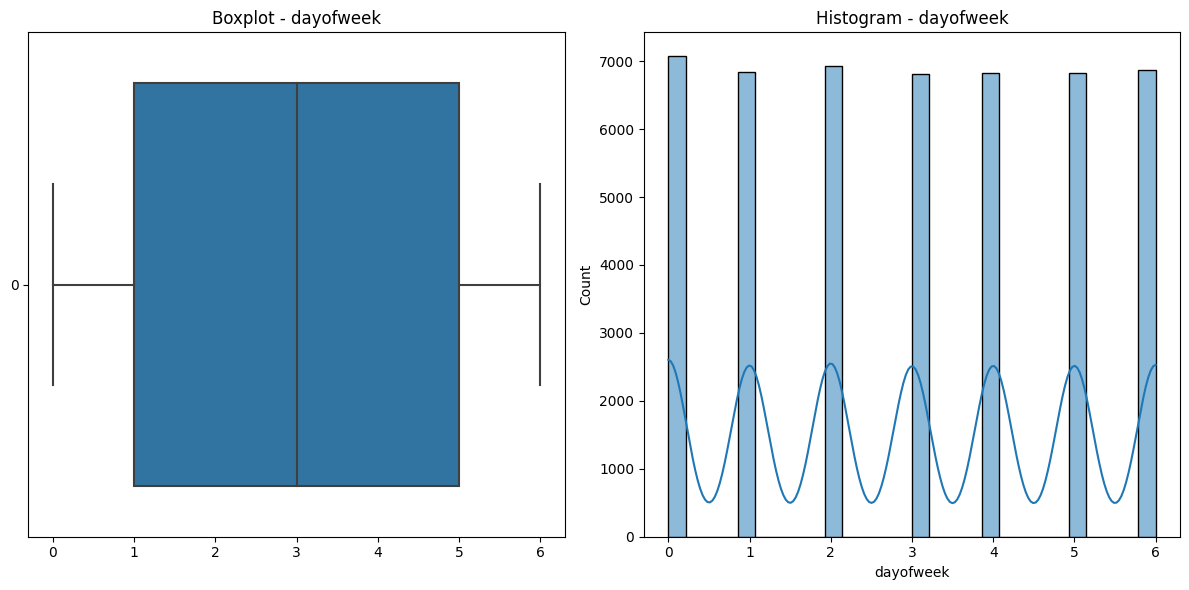

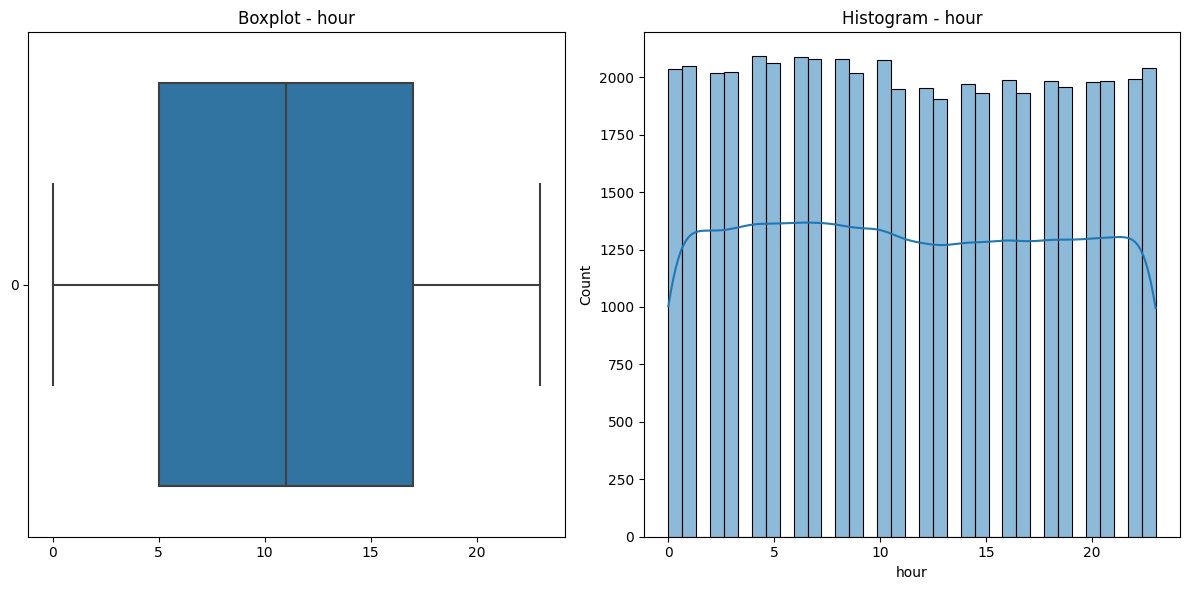

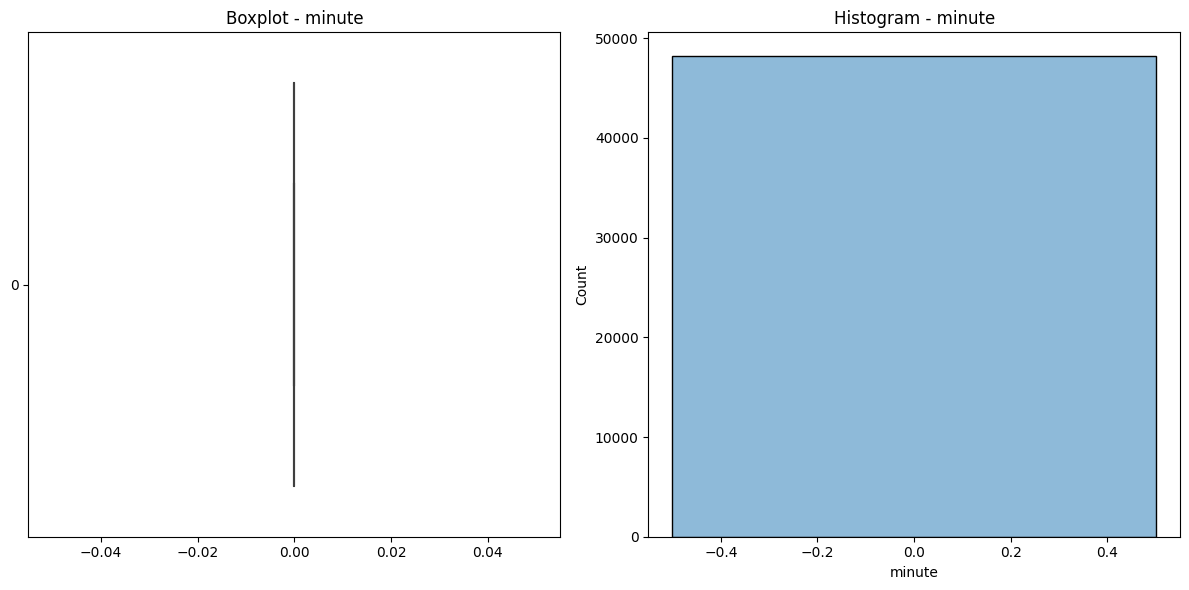

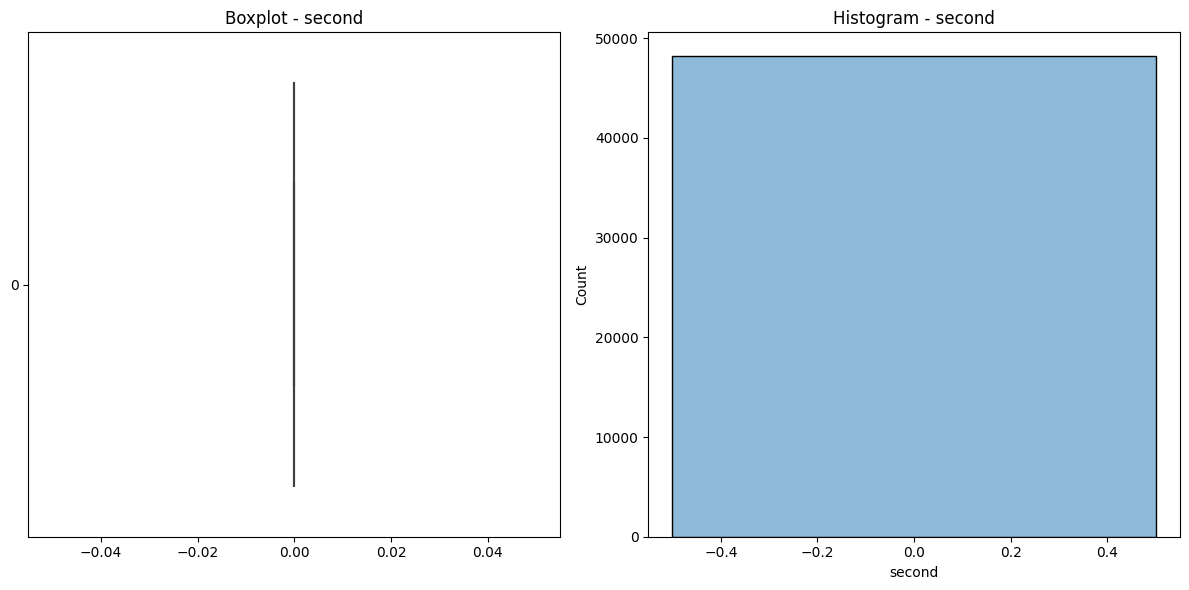

In [ ]:
for num in num_col:
  plot_boxplot_and_histogram(df, num)

Berdasarkan visualisasi kolom numerik dapat disimpulkan bahwa:
1. distribusi dari tiap feature berbeda-beda sehingga perlu dinormalisasi atau dilakukan feature engeneering
2. Terdapat beberapa feature/kolom yang berisi konsisten yang berarti bahwa kolom tersebut perlu dihapuskan karena tidak akan berpengaruh dalam pembuatan model

####Data Preprocessing PART 2

#####Drop Consistant Feature

penghapusan kolom konsisten

In [ ]:
df = df.drop(['minute', 'second'], axis=1)

#####Feature Engeenering

feature engeenering kolom season/musim menggunakan kolom month

In [ ]:
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Membuat kolom "season" berdasarkan pemetaan
df['season'] = df['month'].map(season_mapping)

melakukan feature engeneering kolom deret waktu

In [ ]:
# Mengonversi kolom tahun ke sin dan cos
df["sin_year"] = np.sin(2 * np.pi * df["year"] / max(df["year"]))
df["cos_year"] = np.cos(2 * np.pi * df["year"] / max(df["year"]))

# Mengonversi kolom bulan ke sin dan cos
df["sin_month"] = np.sin(2 * np.pi * (df["month"] - 1) / 12)
df["cos_month"] = np.cos(2 * np.pi * (df["month"] - 1) / 12)

# Mengonversi kolom hari ke sin dan cos
df["sin_day"] = np.sin(2 * np.pi * (df["day"] - 1) / 31)
df["cos_day"] = np.cos(2 * np.pi * (df["day"] - 1) / 31)

# Mengonversi kolom minggu ke sin dan cos
df["sin_week"] = np.sin(2 * np.pi * (df["week"] - 1) / 52)
df["cos_week"] = np.cos(2 * np.pi * (df["week"] - 1) / 52)

# Mengonversi kolom hari dalam seminggu ke sin dan cos
df["sin_dayofweek"] = np.sin(2 * np.pi * df["dayofweek"] / 7)
df["cos_dayofweek"] = np.cos(2 * np.pi * df["dayofweek"] / 7)

# Mengonversi kolom jam ke sin dan cos
df["sin_hour"] = np.sin(2 * np.pi * df["hour"] / 24)
df["cos_hour"] = np.cos(2 * np.pi * df["hour"] / 24)

df = df.drop(['year', 'month', 'day', 'week', 'dayofweek', 'hour'], axis=1)

mengganti isi kolom holiday dengan 1 jika terdapat hari libur dan 0 jika tidak

In [ ]:
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 'None' else 1)

menggabungkan beberapa kategori dalam feature weather_main

In [ ]:
weather_mapping = {
    'Drizzle': 'Rain',
    'Haze': 'Fog',
    'Mist': 'Fog'
}
df['weather_main'] = df['weather_main'].replace(weather_mapping)

#####Encode

melakukan encode kolom kategorikal menggunakan label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['weather_main'] = encoder.fit_transform(df['weather_main'])
df['season'] = encoder.fit_transform(df['season'])

df = df.drop('weather_description',axis=1)

#### Ringkasan Metode
Pada percobaan ini kami menggunakan dua model regresi yaitu Support Vector Regression(SVR) dan Artificial Neural Network(ANN).

Sebelum pembuatan model, dilakukan split atau pembagian data menjadi train, val, dan test dengan perbandingan 70, 15, 15

#####Split Data

In [ ]:
T1 = int(0.7 * len(df))
T2 = int(0.85 * len(df))

train = df.iloc[:T1]
val = df.iloc[T1:T2]
test = df.iloc[T2:]

train.shape, val.shape, test.shape

((33730, 22), (7228, 22), (7229, 22))

In [ ]:
X_train = train.drop('traffic_volume', axis=1)
y_train = train['traffic_volume']
X_val = val.drop('traffic_volume', axis=1)
y_val = val['traffic_volume']
X_test = test.drop('traffic_volume', axis=1)
y_test = test['traffic_volume']

#####Scaling Data

melakukan scale data menggunakan min max scaler pada kolom numerik

In [ ]:
from sklearn.preprocessing import MinMaxScaler
col_selected = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
scaler = MinMaxScaler()
scaler.fit(X_train[col_selected])

X_train[col_selected] = scaler.transform(X_train[col_selected])
X_test[col_selected] = scaler.transform(X_test[col_selected])
X_val[col_selected] = scaler.transform(X_val[col_selected])

In [ ]:
print(X_train.columns)
X_train.head()

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'hour_day_part', 'is_weekend', 'season', 'sin_year', 'cos_year',
       'sin_month', 'cos_month', 'sin_day', 'cos_day', 'sin_week', 'cos_week',
       'sin_dayofweek', 'cos_dayofweek', 'sin_hour', 'cos_hour'],
      dtype='object')


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,hour_day_part,is_weekend,season,sin_year,...,sin_month,cos_month,sin_day,cos_day,sin_week,cos_week,sin_dayofweek,cos_dayofweek,sin_hour,cos_hour
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,0,0.935245,0.0,0.0,0.40,1,3,0,0,-0.01868,...,-1.0,-1.836970e-16,0.201299,0.97953,-1.0,-1.836970e-16,0.781831,0.62349,7.071068e-01,-0.707107
2012-10-02 10:00:00,0,0.938749,0.0,0.0,0.75,1,3,0,0,-0.01868,...,-1.0,-1.836970e-16,0.201299,0.97953,-1.0,-1.836970e-16,0.781831,0.62349,5.000000e-01,-0.866025
2012-10-02 11:00:00,0,0.939463,0.0,0.0,0.90,1,4,0,0,-0.01868,...,-1.0,-1.836970e-16,0.201299,0.97953,-1.0,-1.836970e-16,0.781831,0.62349,2.588190e-01,-0.965926
2012-10-02 12:00:00,0,0.941247,0.0,0.0,0.90,1,4,0,0,-0.01868,...,-1.0,-1.836970e-16,0.201299,0.97953,-1.0,-1.836970e-16,0.781831,0.62349,1.224647e-16,-1.000000
2012-10-02 13:00:00,0,0.944524,0.0,0.0,0.75,1,4,0,0,-0.01868,...,-1.0,-1.836970e-16,0.201299,0.97953,-1.0,-1.836970e-16,0.781831,0.62349,-2.588190e-01,-0.965926


#####SVM Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

y_pred = svm_regressor.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error (MSE) Data Validation :", mse)
print("R-squared (R2) Score Data Validation :", r2)

y_pred = svm_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) Data Test:", mse)
print("R-squared (R2) Score Data Test:", r2)





Mean Squared Error (MSE) Data Validation : 1216540.729403221
R-squared (R2) Score Data Validation : 0.6850244241082288
Mean Squared Error (MSE) Data Test: 1213399.4351140717
R-squared (R2) Score Data Test: 0.6917295291742989


In [ ]:
scoring = pd.DataFrame()
new_row = {'Test': 'svm_regressor', 'MSE': mse,'R2_score': r2}
scoring = scoring.append(new_row, ignore_index = True)
scoring.set_index('Test').sort_values(by = 'R2_score', ascending=False)

<ipython-input-33-1ae09d22becf>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoring = scoring.append(new_row, ignore_index = True)


,MSE,R2_score
Test,,
svm_regressor,1.213399e+06,0.69173


##### ANN

###### ANN 1

In [ ]:
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.utils import plot_model

In [ ]:
# Membangun model ANN
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Untuk masalah regresi, satu unit di lapisan output tanpa fungsi aktivasi
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')  # Mean squared error (MSE) digunakan untuk regresi

# Pelatihan model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluasi model
loss = model.evaluate(X_val, y_val)
print(f'Loss pada data pengujian: {loss}')

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'MSE Score: {mse}')


new_row = {'Test': 'ANN(2 Hidden Layer, Relu, 10 epochs)', 'MSE': mse,'R2_score': r2}
scoring = scoring.append(new_row, ignore_index = True)
scoring.set_index('Test').sort_values(by = 'R2_score', ascending=False)

Epoch 1/10
1055/1055 [==============================] - 3s 2ms/step - loss: 5934897.5000 - val_loss: 2105684.5000
Epoch 2/10
1055/1055 [==============================] - 2s 2ms/step - loss: 1370761.7500 - val_loss: 1151674.7500
Epoch 3/10
1055/1055 [==============================] - 3s 3ms/step - loss: 1065780.2500 - val_loss: 1007321.8125
Epoch 4/10
1055/1055 [==============================] - 3s 3ms/step - loss: 931830.6250 - val_loss: 890271.5625
Epoch 5/10
1055/1055 [==============================] - 2s 2ms/step - loss: 821608.8750 - val_loss: 791593.5000
Epoch 6/10
1055/1055 [==============================] - 2s 2ms/step - loss: 734694.3125 - val_loss: 681108.6875
Epoch 7/10
1055/1055 [==============================] - 2s 2ms/step - loss: 660768.1250 - val_loss: 636558.1250
Epoch 8/10
1055/1055 [==============================] - 2s 2ms/step - loss: 600728.9375 - val_loss: 569257.0000
Epoch 9/10
1055/1055 [==============================] - 3s 3ms/step - loss: 545284.3125 - val_loss

<ipython-input-35-01309e078756>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoring = scoring.append(new_row, ignore_index = True)


,MSE,R2_score
Test,,
"ANN(2 Hidden Layer, Relu, 10 epochs)",4.475869e+05,0.886288
svm_regressor,1.213399e+06,0.691730


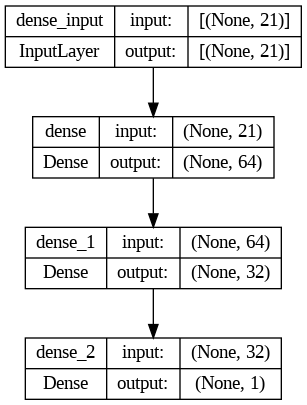

In [ ]:
#Visualisasi Model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

######ANN 2

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Membangun model ANN
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Untuk masalah regresi, satu unit di lapisan output tanpa fungsi aktivasi
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')  # Mean squared error (MSE) digunakan untuk regresi

# Pelatihan model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluasi model
loss = model.evaluate(X_val, y_val)
print(f'Loss pada data pengujian: {loss}')

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'MSE Score: {mse}')

new_row = {'Test': 'ANN(2 Hidden Layer, Relu, 100 epochs)', 'MSE': mse,'R2_score': r2}
scoring = scoring.append(new_row, ignore_index = True)
scoring.set_index('Test').sort_values(by = 'R2_score', ascending=False)

Epoch 1/100
1055/1055 [==============================] - 3s 2ms/step - loss: 6163117.0000 - val_loss: 2264894.2500
Epoch 2/100
1055/1055 [==============================] - 3s 3ms/step - loss: 1411905.6250 - val_loss: 1143684.1250
Epoch 3/100
1055/1055 [==============================] - 3s 3ms/step - loss: 1071662.5000 - val_loss: 1011188.1250
Epoch 4/100
1055/1055 [==============================] - 2s 2ms/step - loss: 968008.2500 - val_loss: 922391.6875
Epoch 5/100
1055/1055 [==============================] - 2s 2ms/step - loss: 906687.1250 - val_loss: 874010.0625
Epoch 6/100
1055/1055 [==============================] - 2s 2ms/step - loss: 866054.9375 - val_loss: 857278.0000
Epoch 7/100
1055/1055 [==============================] - 2s 2ms/step - loss: 825602.6875 - val_loss: 796009.8750
Epoch 8/100
1055/1055 [==============================] - 3s 3ms/step - loss: 784709.2500 - val_loss: 763019.0625
Epoch 9/100
1055/1055 [==============================] - 3s 3ms/step - loss: 733252.3750 -

<ipython-input-37-6e6a7c1db72f>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoring = scoring.append(new_row, ignore_index = True)


,MSE,R2_score
Test,,
"ANN(2 Hidden Layer, Relu, 100 epochs)",2.414304e+05,0.938663
"ANN(2 Hidden Layer, Relu, 10 epochs)",4.475869e+05,0.886288
svm_regressor,1.213399e+06,0.691730


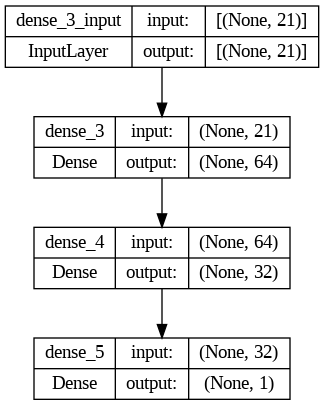

In [ ]:
#Visualisasi Model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

######ANN 3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score

# Buat model dengan lebih banyak layer
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer tanpa aktivasi
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluasi model
loss = model.evaluate(X_val, y_val)
print(f'Loss pada data pengujian: {loss}')

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'MSE Score: {mse}')

new_row = {'Test': 'ANN(3 Hidden Layer, Relu, 10 epochs)', 'MSE': mse,'R2_score': r2}
scoring = scoring.append(new_row, ignore_index = True)
scoring.set_index('Test').sort_values(by = 'R2_score', ascending=False)

Epoch 1/10
528/528 [==============================] - 3s 4ms/step - loss: 4954647.0000 - val_loss: 1179852.3750
Epoch 2/10
528/528 [==============================] - 2s 4ms/step - loss: 981636.5000 - val_loss: 837894.1875
Epoch 3/10
528/528 [==============================] - 2s 4ms/step - loss: 763047.7500 - val_loss: 694133.6875
Epoch 4/10
528/528 [==============================] - 2s 3ms/step - loss: 585935.8125 - val_loss: 492779.5000
Epoch 5/10
528/528 [==============================] - 2s 3ms/step - loss: 433324.2188 - val_loss: 390541.0938
Epoch 6/10
528/528 [==============================] - 2s 4ms/step - loss: 356915.1562 - val_loss: 348029.5000
Epoch 7/10
528/528 [==============================] - 2s 3ms/step - loss: 326615.5000 - val_loss: 337453.8750
Epoch 8/10
528/528 [==============================] - 1s 3ms/step - loss: 309078.0000 - val_loss: 323794.6875
Epoch 9/10
528/528 [==============================] - 1s 3ms/step - loss: 297159.8438 - val_loss: 303981.1875
Epoch 10

<ipython-input-39-14bbb5431642>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoring = scoring.append(new_row, ignore_index = True)


,MSE,R2_score
Test,,
"ANN(2 Hidden Layer, Relu, 100 epochs)",2.414304e+05,0.938663
"ANN(3 Hidden Layer, Relu, 10 epochs)",2.842305e+05,0.927790
"ANN(2 Hidden Layer, Relu, 10 epochs)",4.475869e+05,0.886288
svm_regressor,1.213399e+06,0.691730


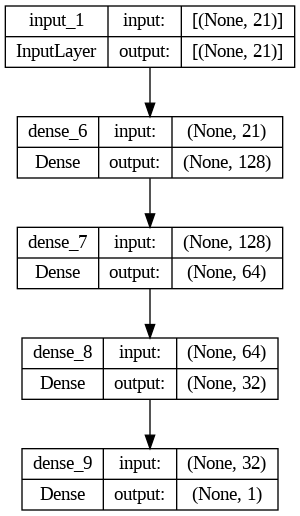

In [ ]:
#Visualisasi Model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

###### ANN 4

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score

# Buat model dengan lebih banyak layer
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer tanpa aktivasi
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluasi model
loss = model.evaluate(X_val, y_val)
print(f'Loss pada data pengujian: {loss}')

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'MSE Score: {mse}')

new_row = {'Test': 'ANN(3 Hidden Layer, Relu, 100 epochs)', 'MSE': mse,'R2_score': r2}
scoring = scoring.append(new_row, ignore_index = True)
scoring.set_index('Test').sort_values(by = 'R2_score', ascending=False)

Epoch 1/100
528/528 [==============================] - 3s 4ms/step - loss: 4914966.0000 - val_loss: 1143210.6250
Epoch 2/100
528/528 [==============================] - 1s 3ms/step - loss: 997550.4375 - val_loss: 886915.6250
Epoch 3/100
528/528 [==============================] - 1s 2ms/step - loss: 745906.9375 - val_loss: 621813.8750
Epoch 4/100
528/528 [==============================] - 1s 2ms/step - loss: 513968.1562 - val_loss: 456603.5312
Epoch 5/100
528/528 [==============================] - 1s 2ms/step - loss: 408206.4688 - val_loss: 397945.3438
Epoch 6/100
528/528 [==============================] - 1s 2ms/step - loss: 373463.3750 - val_loss: 364629.0312
Epoch 7/100
528/528 [==============================] - 1s 3ms/step - loss: 358062.5312 - val_loss: 356038.7500
Epoch 8/100
528/528 [==============================] - 1s 2ms/step - loss: 347994.8750 - val_loss: 356481.8438
Epoch 9/100
528/528 [==============================] - 1s 3ms/step - loss: 336435.1875 - val_loss: 346634.8750

<ipython-input-41-ba86b5fefebf>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoring = scoring.append(new_row, ignore_index = True)


,MSE,R2_score
Test,,
"ANN(2 Hidden Layer, Relu, 100 epochs)",2.414304e+05,0.938663
"ANN(3 Hidden Layer, Relu, 100 epochs)",2.546892e+05,0.935295
"ANN(3 Hidden Layer, Relu, 10 epochs)",2.842305e+05,0.927790
"ANN(2 Hidden Layer, Relu, 10 epochs)",4.475869e+05,0.886288
svm_regressor,1.213399e+06,0.691730


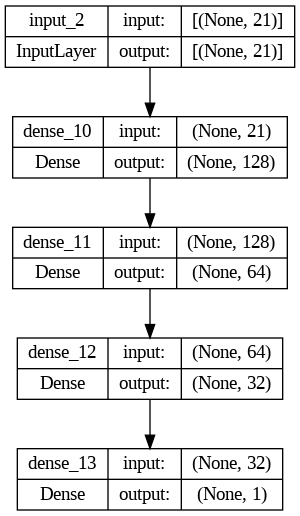

In [ ]:
#Visualisasi Model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

#### Hasil dan Analisis
Kami Menggunakan matriks evaluasi nilai MSE dan R2 score untuk mengukur performansi model yang digunakan. Dari hasil percobaan dengan 5 skema berbeda, yaitu :
- SVR (kernel : liner)
- ANN ( 2 Hidden Layer , Activation Fuction : Relu , Optimizer : Adam, Loss : MSE, Epochs : 10)
- ANN ( 2 Hidden Layer , Activation Fuction : Relu , Optimizer : Adam, Loss : - MSE, Epochs : 100)
- ANN ( 3 Hidden Layer , Activation Fuction : Relu , Optimizer : Adam, Loss : MSE, Epochs : 10)
- ANN ( 3 Hidden Layer , Activation Fuction : Relu , Optimizer : Adam, Loss : MSE, Epochs : 100)


| Model                                  | MSE          |R2 Score |
| ---------------------------------------|--------------|---------|
| ANN(2 Hidden Layer, Relu, 100 epochs)  |2.436971e+05  | 0.938087|
| ANN(3 Hidden Layer, Relu, 10 epochs)   |2.592526e+05  | 0.934136|
| ANN(3 Hidden Layer, Relu, 100 epochs)  |2.628701e+05  | 0.933216|
| ANN(2 Hidden Layer, Relu, 10 epochs)   |6.841826e+05  | 0.826180|
| SVM_REGRESSOR                          |1.213399e+06  | 0.691730|


Dapat dilihat ANN dengan 2 Hidden Layer (100 epochs) memberikan hasil terbaik dengan R2 score  : 0.938087. Namun, jika mempertimbangkan waktu eksekusi ANN dengan 3 Hidden Layer(10 epochs) memberikan hasil yang seimbang dengan selisih R2 score sebesar 0.003951.

#### Kesimpulan
Berdasarkan data yang diolah maka dapat disimpulkan bahwa model yang dibuat untuk data tersebut mencapai akurasi yang diinginkan yaitu dengan R2 Score lebih dari  80% dengan menggunakan model ANN. Namun, masih terdapat kekurangan di model SVM, walaupun begitu masih bisa dilakukan perbaikan lagi untuk menjadi model yang lebih baik lagi di model SVM ataupun ANN dengan melakukan tunning hyperparameter untuk mendapatkan akurasi yg lebih baik lagi